Srishakti Nedunchelian U2322873J
Murugappan Venkatesh   U2322495K
Naveen Sivakumar U2322942K

### This project is about predicting the CO2 emissions of vehicles by considering several predictor variables pertaining to the attributes of the vehicles.

In [20]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Importing the Dataset and describing it

In [21]:
co2_data = pd.read_csv('fuel.csv',low_memory = False)
co2_data.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [22]:
print("Data type : ", type(co2_data))
print("Data dims : ", co2_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (38113, 81)


In [23]:
print(co2_data.dtypes)

vehicle_id             int64
year                   int64
make                  object
model                 object
class                 object
                      ...   
city_range_ft1       float64
highway_range_ft1    float64
range_ft2            float64
city_range_ft2       float64
highway_range_ft2    float64
Length: 81, dtype: object


In [24]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              36924 non-null  object 
 6   transmission                       38102 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  22693 non-null  object 
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

In [25]:
co2_data.describe()

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,supercharger,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,0.0,0.0,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,0.0,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,NaN,NaN,17.981109,4.606426,0.546218,...,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,NaN,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,NaN,NaN,6.849728,10.113963,4.109282,...,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,NaN,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,NaN,NaN,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,NaN,NaN,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,NaN,NaN,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,NaN,NaN,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,NaN,NaN,150.000000,150.000000,145.000000,...,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,NaN,103.030000,90.550000


## Data Preparation (Cleaning)

#### We are going to remove unecessary columns from the dataset to clean it.

#### Most cars do not have turbochargers in this dataset. Hence the missing values here is not required. Therefore, we rename these missing values to the string 'No' for clarity.

In [26]:
# Keep only the necessary columns
co2_clean = [
    'tailpipe_co2_in_grams_mile_ft1', 'engine_displacement', 'engine_cylinders',
    'turbocharger', 'fuel_type', 'class', 'transmission', 'drive'
]
co2dataclean = co2_data[co2_clean].copy()  # Create a copy to work with

# Check for missing values in each column
print(co2dataclean.isnull().sum())

# Drop rows where the response variable 'tailpipe_co2_in_grams_mile_ft1' is missing
co2dataclean.dropna(subset=['tailpipe_co2_in_grams_mile_ft1'], inplace=True)

# Assuming 'turbocharger' is categorical, fill missing values with 'No' if applicable
if 'turbocharger' in co2dataclean.columns and co2dataclean['turbocharger'].isnull().any():
    co2dataclean['turbocharger'].fillna('False', inplace=True)

# Drop rows with any remaining missing values
co2dataclean.dropna(inplace=True)

# Display the cleaned dataset
print(co2dataclean.info())

tailpipe_co2_in_grams_mile_ft1        0
engine_displacement                 134
engine_cylinders                    136
turbocharger                      32874
fuel_type                             0
class                                 0
transmission                         11
drive                              1189
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 36794 entries, 4 to 38112
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tailpipe_co2_in_grams_mile_ft1  36794 non-null  float64
 1   engine_displacement             36794 non-null  float64
 2   engine_cylinders                36794 non-null  float64
 3   turbocharger                    36794 non-null  object 
 4   fuel_type                       36794 non-null  object 
 5   class                           36794 non-null  object 
 6   transmission                    36794 non-null  object 
 7   drive     


#### Since transmission and drive are integral parts of a vehicle, we can omit rows with null values for these variables .
#### The number of null values for these 2 variables is a very small portion, so it wont affect the quality of dataset.


## Taking care of NULL Values

In [27]:
# Remove rows where there are null values in 'transmission' and 'drive' columns
co2dataclean.dropna(subset=['transmission', 'drive'], inplace=True)

# You can check again to see if there are still any missing values in these columns
print(co2dataclean.isnull().sum())

# Display the cleaned dataset
print(co2dataclean.info())

tailpipe_co2_in_grams_mile_ft1    0
engine_displacement               0
engine_cylinders                  0
turbocharger                      0
fuel_type                         0
class                             0
transmission                      0
drive                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 36794 entries, 4 to 38112
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tailpipe_co2_in_grams_mile_ft1  36794 non-null  float64
 1   engine_displacement             36794 non-null  float64
 2   engine_cylinders                36794 non-null  float64
 3   turbocharger                    36794 non-null  object 
 4   fuel_type                       36794 non-null  object 
 5   class                           36794 non-null  object 
 6   transmission                    36794 non-null  object 
 7   drive                           36794 non-

## Check the Variable Information

In [28]:
#check the turbocharger information
print(co2dataclean['turbocharger'].dropna().value_counts())

turbocharger
False    31679
True      5115
Name: count, dtype: int64


In [29]:
#check the transmission information
print(co2dataclean['transmission'].dropna().value_counts())

transmission
Automatic 4-Speed                   10785
Manual 5-Speed                       7959
Automatic 3-Speed                    2720
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Automatic 6-Speed                    1447
Manual 4-Speed                       1368
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      697
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         77
Manual 7-Speed       

In [30]:
#check the drive information
print(co2dataclean['drive'].dropna().value_counts())

drive
Front-Wheel Drive             13303
Rear-Wheel Drive              12982
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2094
4-Wheel Drive                  1100
2-Wheel Drive                   491
Part-time 4-Wheel Drive         176
Name: count, dtype: int64


In [31]:
co2dataclean['engine_displacement'].describe()

count    36794.000000
mean         3.337539
std          1.361471
min          0.600000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: engine_displacement, dtype: float64

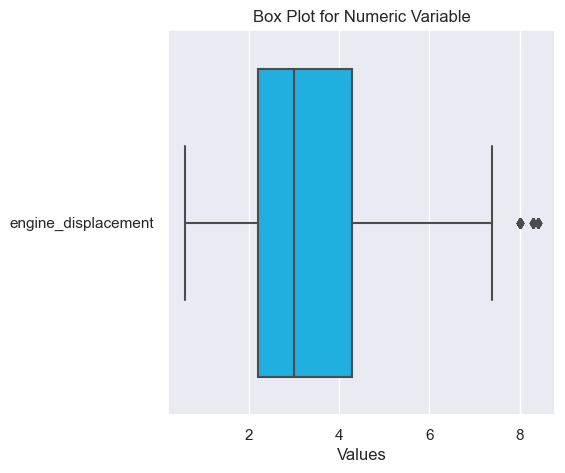

engine_displacement has 43 outliers.
The skewness of engine_displacement is: 0.6058044619982662


In [32]:
numeric_variable = ['engine_displacement']

# Draw box plots for a numeric variable
plt.figure(figsize=(5, 5))
sb.boxplot(data=co2dataclean[numeric_variable], orient="h", color='deepskyblue')
plt.title('Box Plot for Numeric Variable')
plt.xlabel('Values')
plt.show()

# Calculate and print the number of outliers for numeric variable
for i, variable in enumerate(numeric_variable):
    q1 = co2dataclean[variable].quantile(0.25)
    q3 = co2dataclean[variable].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = co2dataclean[(co2dataclean[variable] < lower_bound) | (co2dataclean[variable] > upper_bound)][variable]
    num_outliers = len(outliers)

    print(f"{variable} has {num_outliers} outliers.")

from scipy.stats import skew

# Calculate and print skewness for each variable
skewness = skew(co2dataclean['engine_displacement'])
print(f"The skewness of {'engine_displacement'} is: {skewness}")

### Removing outliers for the final cleaned set of data

In [33]:
# Filter out the outliers
co2dataclean = co2dataclean[(co2dataclean['engine_displacement'] >= lower_bound) &
                             (co2dataclean['engine_displacement'] <= upper_bound)]

# Now filtered_data contains only the rows without the outliers
print("Data with outliers removed:", co2dataclean.shape)

Data with outliers removed: (36751, 8)


# Statistical summary

In [34]:

# Statistical Description of Predictor Variables
predictor_vars = ['engine_displacement', 'engine_cylinders', 'turbocharger',
                  'fuel_type', 'class', 'transmission', 'drive']

## Uni-variate statistics

## Visualisation for tailpipe_co2_in_grams_mile_ft1- numeric variable

In [35]:
co2_emissions = pd.DataFrame(co2dataclean['tailpipe_co2_in_grams_mile_ft1'])
co2_emissions.describe()

,tailpipe_co2_in_grams_mile_ft1
count,36751.000000
mean,475.308074
std,118.841748
min,29.000000
25%,397.000000
50%,467.736842
75%,555.437500
max,1269.571429


Text(0.5, 1.0, 'Histogram with KDE of Co2 Emissions')

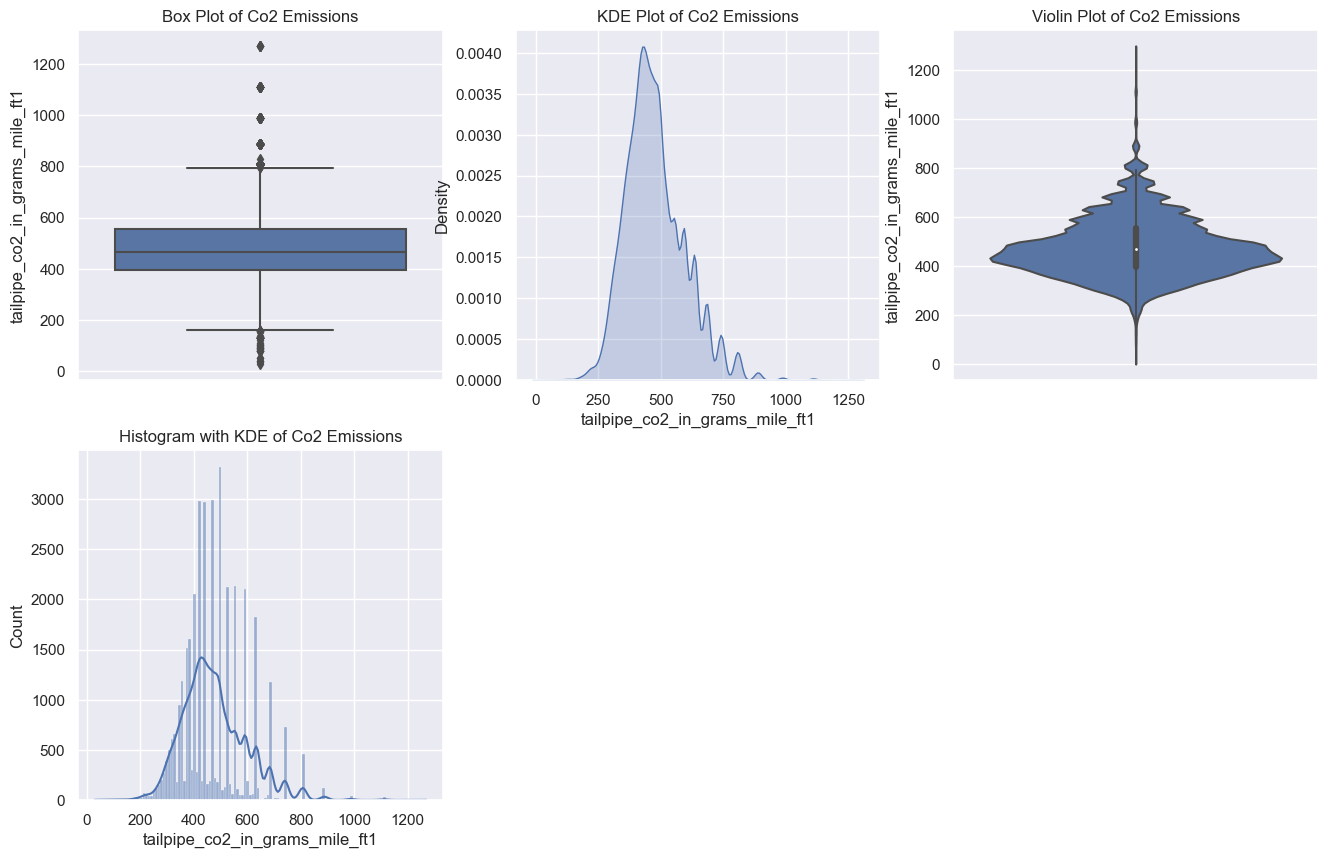

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))
# Boxplot
plt.subplot(2, 3, 1)
sb.boxplot(data=co2dataclean, y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plot of Co2 Emissions')

# KDE Plot
plt.subplot(2, 3, 2)
sb.kdeplot(data=co2dataclean['tailpipe_co2_in_grams_mile_ft1'], fill=True)
plt.title('KDE Plot of Co2 Emissions')

# Violin Plot
plt.subplot(2, 3, 3)
sb.violinplot(data=co2dataclean, y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Violin Plot of Co2 Emissions')

# Histogram with KDE
plt.subplot(2, 3, 4)
sb.histplot(co2dataclean['tailpipe_co2_in_grams_mile_ft1'], kde=True)
plt.title('Histogram with KDE of Co2 Emissions')


### Box Plot of CO2 Emissions: 
#### The box plot reveals that the median CO2 emissions are around 500 grams per mile, indicated by the line inside the box. The lower quartile is near 400 grams per mile, and the upper quartile is close to below 600 grams per mile, making the interquartile range roughly 200 grams per mile. The whiskers extend from approximately 200 to 800 grams per mile, suggesting that most of the data fall within this range. However, there are several outliers that go as high as approximately 1300 grams per mile.

### KDE Plot of CO2 Emissions : 
#### The KDE plot shows a clear peak just below 500 grams per mile, suggesting this is the most common range of emissions. The curve is skewed right, with a tail extending toward higher emissions, indicating that while the majority of vehicles emit a smaller amount of CO2, there are a few that emit significantly more.

### Violin Plot of CO2 Emissions: 
#### The violin plot shows a distribution similar to the box plot, with the median also around 500 grams per mile. The thickness of the violin indicates a high density of data points around the median, tapering off as emissions values increase or decrease. The width of the violin is symmetric around the median, suggesting a relatively even distribution of data above and below the median, although the long tail at the top indicates the presence of higher outliers.

### Histogram with KDE of CO2 Emissions: 
#### The histogram shows that most vehicles fall into the300 to 400 grams per mile category, with the highest count exceeding 3000 vehicles. The number of vehicles quickly drops off as emissions increase, with very few vehicles emitting more than 600 grams per mile. The KDE overlay provides a smooth curve that follows the shape of the histogram, emphasizing the concentration of values at the lower end of the emissions scale and the long tail towards the higher end.

## Visualisation for engine_displacement- numeric variable

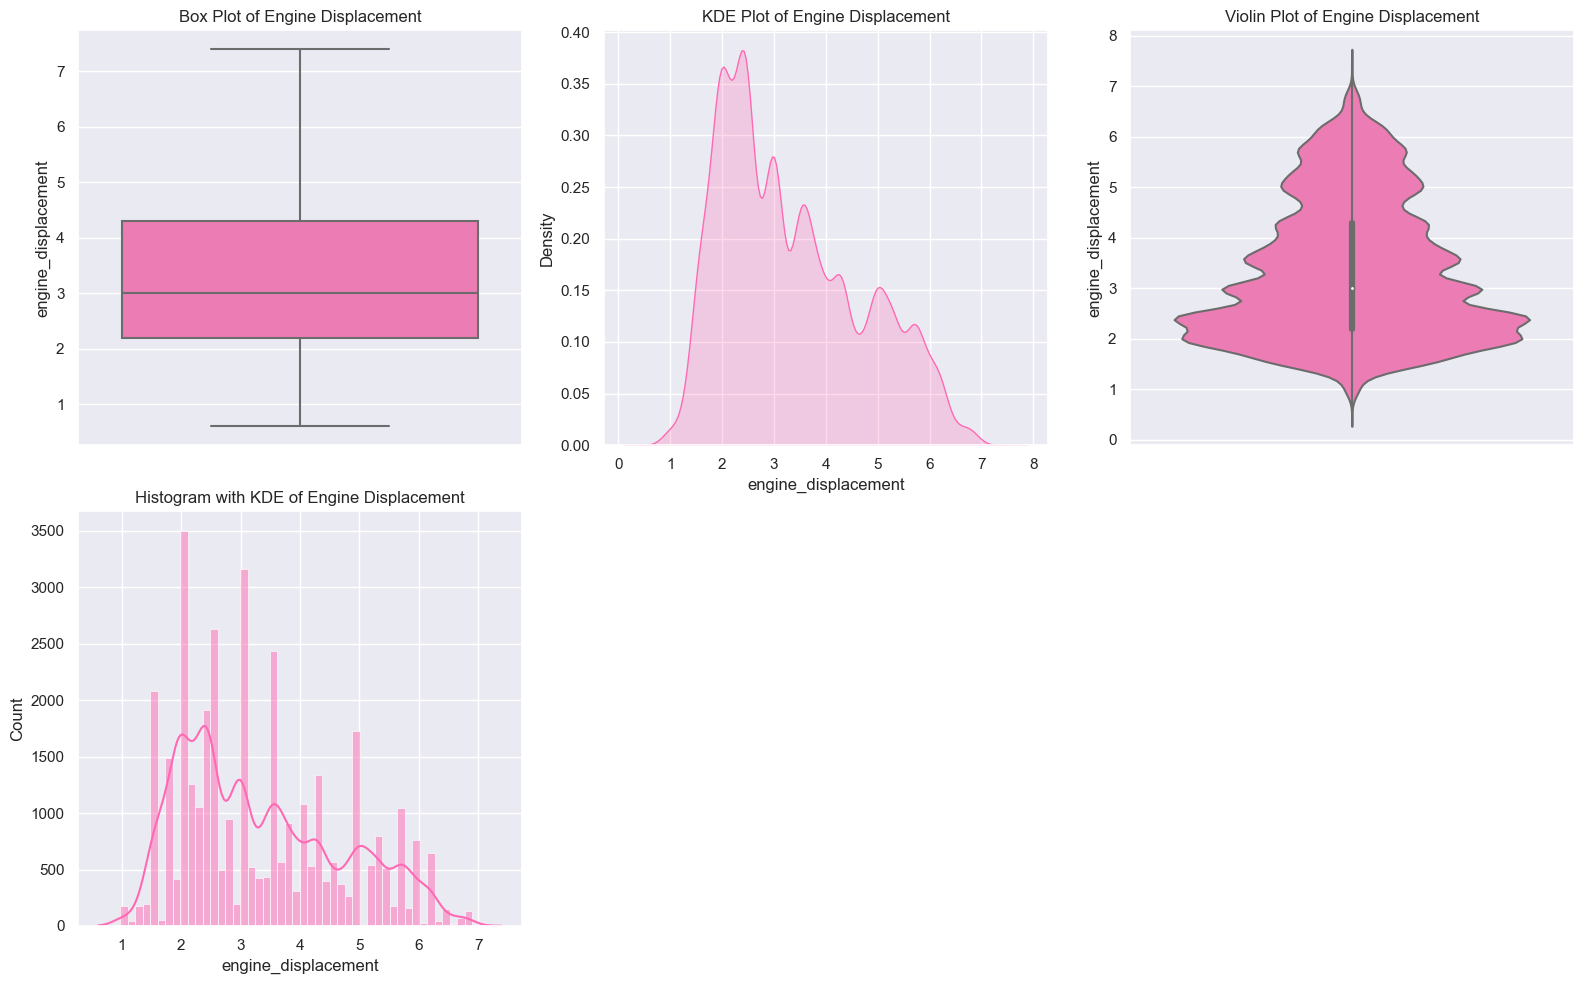

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Boxplot
plt.subplot(2, 3, 1)
sb.boxplot(data=co2dataclean, y='engine_displacement', color='hotpink')
plt.title('Box Plot of Engine Displacement')

# KDE Plot
plt.subplot(2, 3, 2)
sb.kdeplot(data=co2dataclean['engine_displacement'], fill=True, color='hotpink')
plt.title('KDE Plot of Engine Displacement')

# Violin Plot
plt.subplot(2, 3, 3)
sb.violinplot(data=co2dataclean, y='engine_displacement', color='hotpink')
plt.title('Violin Plot of Engine Displacement')

# Histogram with KDE
plt.subplot(2, 3, 4)
sb.histplot(co2dataclean['engine_displacement'], color='hotpink', kde=True, line_kws={"color": "hotpink"})
plt.title('Histogram with KDE of Engine Displacement')

# Show the plot
plt.tight_layout()
plt.show()


### Box Plot of Engine Displacement: 
#### The box plot reveals that the median engine displacement is around 3L, indicated by the line inside the box. The lower quartile is near 2L, and the upper quartile is slightly above 4, making the interquartile range roughly 2L. The whiskers extend from approximately 0.5 L to 7.5L grams per mile, suggesting that most of the data fall within this range. 

### KDE Plot of Engine Displacement : 
#### The KDE plot shows a clear peak just below 0.40 L, suggesting this is the most common range of emissions. The curve is skewed right, with a tail extending toward higher displacemnt, indicating that while the majority of vehicles have smaller engine displacemet, there are a few that lie on the other hand.

### Violin Plot of Engine Displacement: 
#### The violin plot shows a distribution similar to the box plot, with the median also around 3L. The thickness of the violin indicates a high density of data points around the median, tapering off as displacement values increase or decrease. The width of the violin is symmetric around the median, suggesting a relatively even distribution of data above and below the median.

### Histogram with KDE of Engine Displacement: 
#### The histogram shows that most vehicles fall into the 2  to 3 L category, with the highest count touching 3500 vehicles. The number of vehicles quickly drops off displacement increase.

## Visualisation for categorical variables

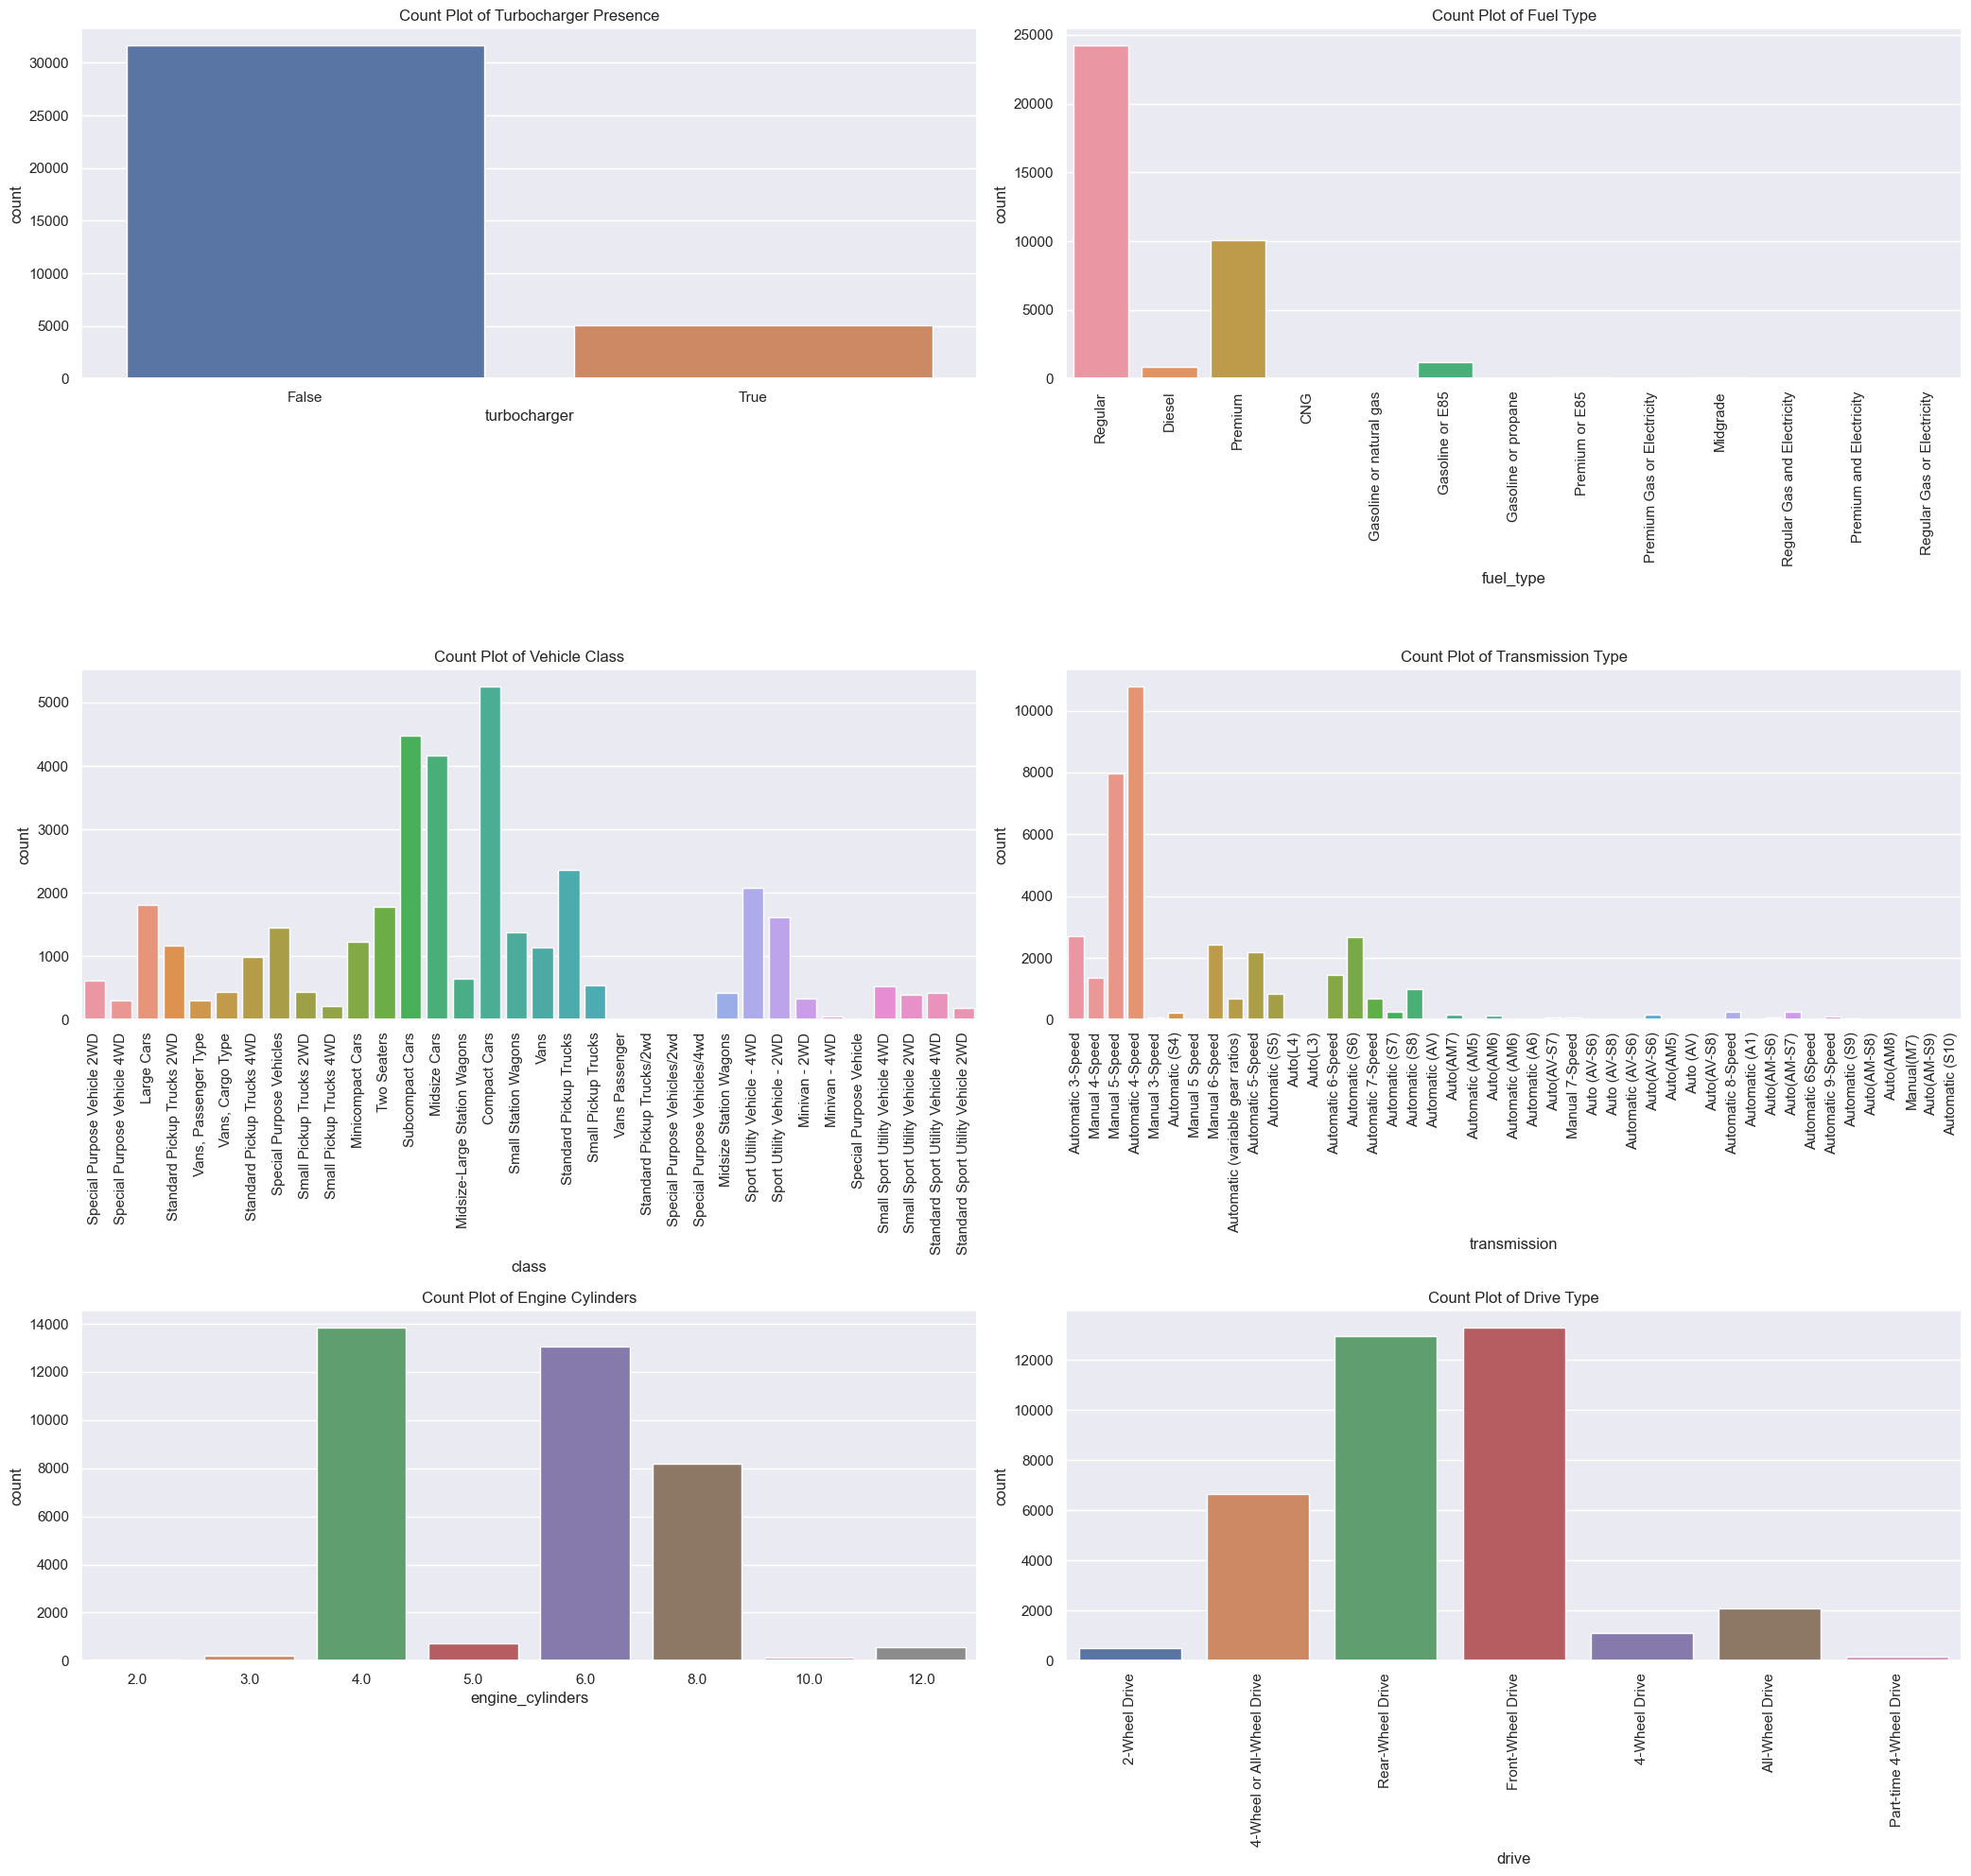

In [38]:
# Set up the matplotlib figure for multiple plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(21, 20))

# Count Plot for 'turbocharger'
sb.countplot(data=co2dataclean, x='turbocharger', ax=axs[0, 0])
axs[0, 0].set_title('Count Plot of Turbocharger Presence')

# Count Plot for 'fuel_type'
sb.countplot(data=co2dataclean, x='fuel_type', ax=axs[0, 1])
axs[0, 1].set_title('Count Plot of Fuel Type')
axs[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Count Plot for 'class'
sb.countplot(data=co2dataclean, x='class', ax=axs[1, 0])
axs[1, 0].set_title('Count Plot of Vehicle Class')
axs[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Count Plot for 'transmission'
sb.countplot(data=co2dataclean, x='transmission', ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Transmission Type')
axs[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Count Plot for 'engine_cylinders'
sb.countplot(data=co2dataclean, x='engine_cylinders', ax=axs[2, 0])
axs[2, 0].set_title('Count Plot of Engine Cylinders')

# Count Plot for 'drive'
sb.countplot(data=co2dataclean, x='drive', ax=axs[2, 1])
axs[2, 1].set_title('Count Plot of Drive Type')
axs[2, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Adjust layout to prevent overlap

plt.tight_layout()
plt.show()


### Count plot for Turbochargers:
#### The graph shows that the number of vehicles withut turbochargers far outweigh the number of vehicles with turbochargers by more than 6 folds.

### Count plot for Fuel Type:
#### The graph shows that the number of vehicles with regular fuel type forms the majority at slightly below 25000 followed by the premium at 10000. The majority of the rest are  Diesel and 'Gasoline or E85'

### Count plot for Vehicle Class:
#### The graph shows that the majority of the vehicles are from the compact cars category followed by subcompact cars and midsize cars.

### Count plot for Transmission Type:
#### The graph shows that the majority of the vehicles are from the autiomatic 4 speed transmission category followed by the manual 5 speed transmission category.

### Count plot for Engine Cylinders:
#### The graph shows that the majority of the vehicles have 4 engine cylinders (nearly 14000) followed by 6 cylinders (~13000) and 8 cylinders (8000) respectively.

### Count plot for Drive Type:
#### The graph shows that the majority of the vehicles have Front wheel drive followed closely by Rear-wheel drive (both above 12000) . And 4 Wheel or All wheel drive make up the third largest protion around 6000 vehicles.

## Bi-variate Analysis

### Here we are comparing engine_displacement with tailpipe_co2_in_grams_mile_ft1.

In [75]:
engineDisp= pd.DataFrame(co2dataclean['engine_displacement'])

In [76]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([engineDisp,co2_emissions], axis = 1).reindex(engineDisp.index)
jointDF

,engine_displacement,tailpipe_co2_in_grams_mile_ft1
4,2.5,522.764706
5,2.5,522.764706
6,4.2,683.615385
7,4.2,683.615385
8,4.2,522.764706
...,...,...
38108,2.0,348.000000
38109,2.0,399.000000
38110,2.0,384.000000
38111,2.0,238.000000


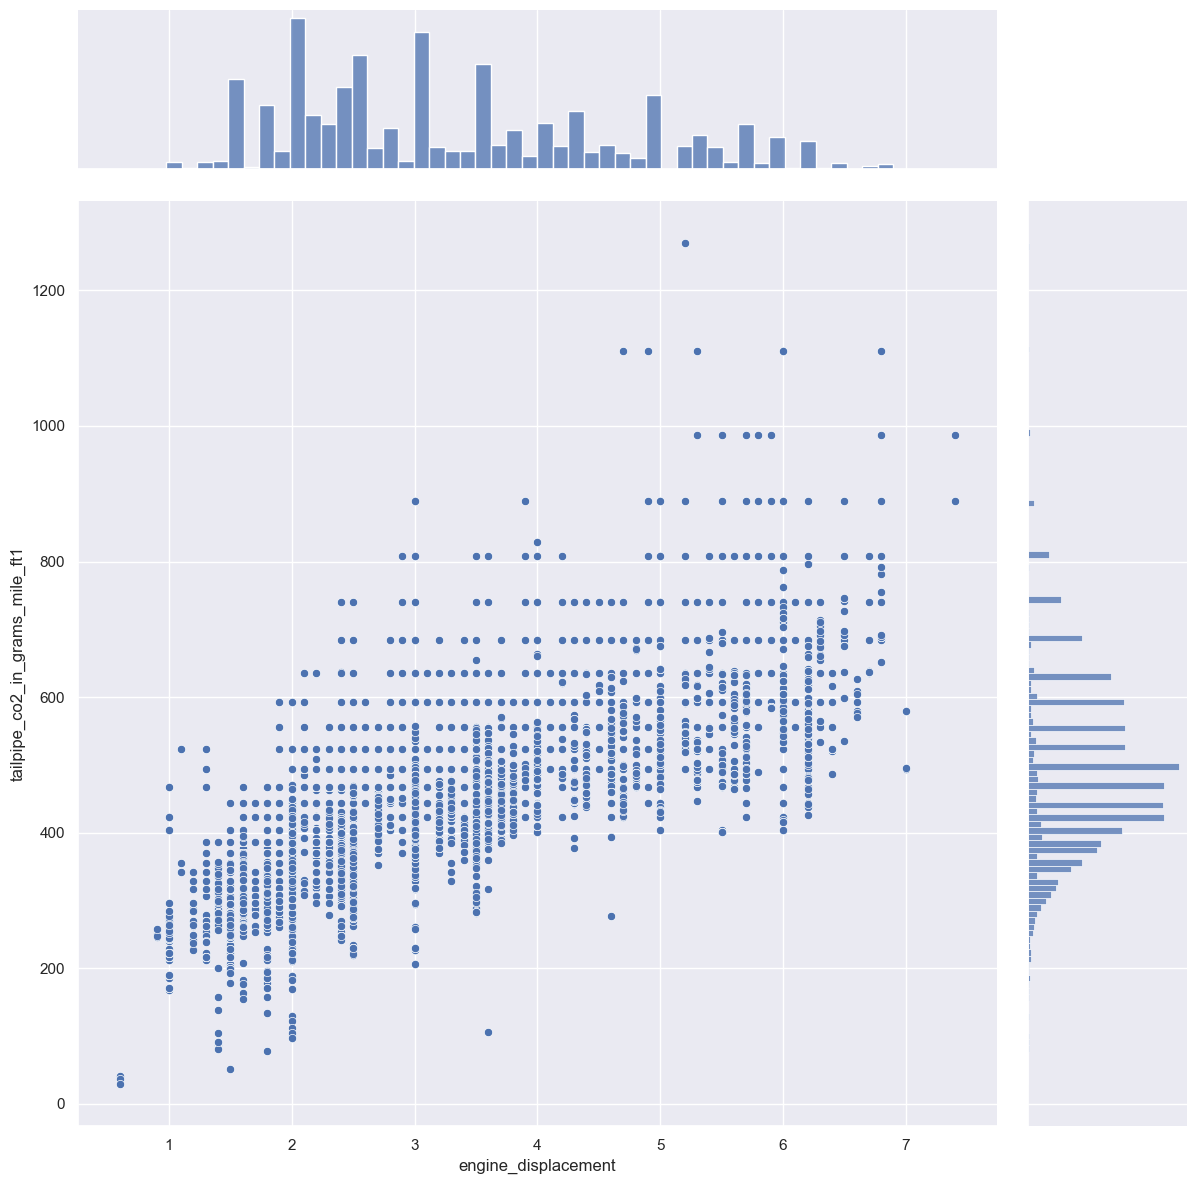

In [41]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "engine_displacement", y = "tailpipe_co2_in_grams_mile_ft1", height = 12)

In [42]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,engine_displacement,tailpipe_co2_in_grams_mile_ft1
engine_displacement,1.000000,0.802013
tailpipe_co2_in_grams_mile_ft1,0.802013,1.000000


<Axes: >

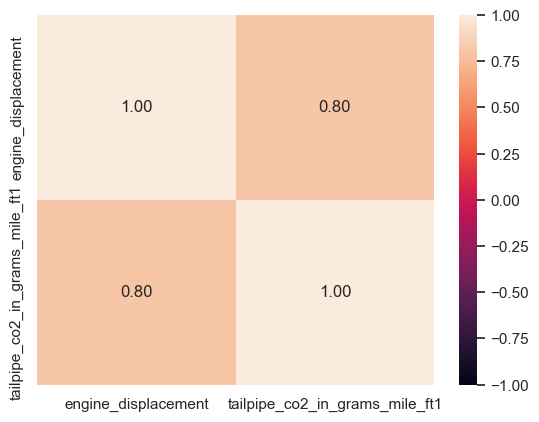

In [77]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Implications:

### From the plot, it looks like as engine displacement increases, tailpipe CO2 emissions also tend to increase, but with a significant amount of variability. There are clusters of higher emissions as the engine displacement goes up, but the relationship does not seem perfectly linear, as there are many points with high emissions even at lower engine displacements.

### The correlation heatmap that shows the correlation coefficient between engine displacement and tailpipe CO2 emissions. The values on the heatmap are 1.00 on the diagonal, which is always the case since any variable has a perfect correlation with itself. Off-diagonal, the value is 0.80, indicating a strong positive correlation between engine displacement and tailpipe CO2 emissions. This means as engine displacement increases, tailpipe CO2 emissions tend to increase as well, which is consistent with the pattern observed in the scatter plot.

### A correlation of 0.80 is considered a strong correlation, suggesting that engine displacement is a good predictor of tailpipe CO2 emissions.

## Here we are comparing turbocharger with tailpipe_co2_in_grams_mile_ft1.

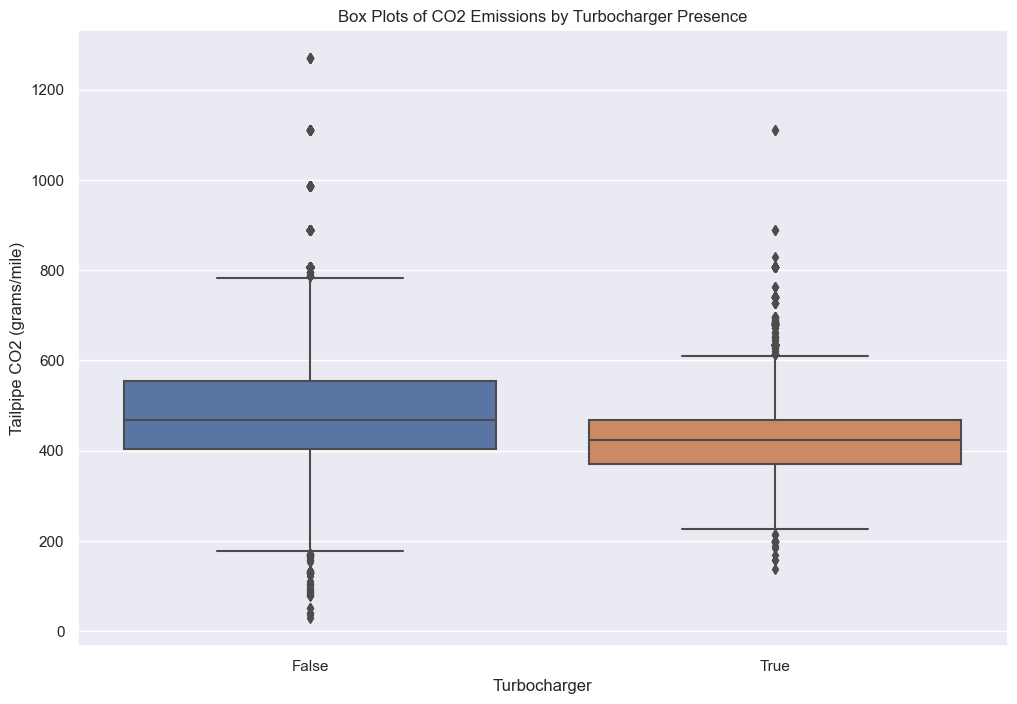

In [44]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots
sb.boxplot(data=co2dataclean, x='turbocharger', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by Turbocharger Presence')
plt.xlabel('Turbocharger')
plt.ylabel('Tailpipe CO2 (grams/mile)')
plt.show()

### Vehicles with a turbocharger (True) have a mean tailpipe CO2 emission of approximately 431.50 grams per mile and a median (50th percentile) of approximately 423.19 grams per mile. The standard deviation (std), which measures the spread of the data, is around 98.04, indicating moderate variability in emissions among turbocharged vehicles. The interquartile range (IQR), which is the range between the 25th and 75th percentiles, is about 97.45, suggesting that the middle 50% of vehicles with a turbocharger have emission values within this range.

### Vehicles without a turbocharger (False) have a higher mean tailpipe CO2 emission of approximately 482.38 grams per mile and a median of approximately 467.74 grams per mile. The standard deviation is higher as well at approximately 120.38, indicating a greater spread in the data compared to turbocharged vehicles. The IQR is 151.48, which is also higher than that of turbocharged vehicles, indicating a wider middle 50% range of emissions.


In [45]:
# Prepare the data for analysis
grouped = co2dataclean.groupby('turbocharger')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

                    mean      median         std         IQR
turbocharger                                                
True          431.503869  423.190476   98.039378   97.445175
False         482.377600  467.736842  120.383361  151.482955


In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'turbocharger'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(turbocharger)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)


                       sum_sq       df         F    PR(>F)
C(turbocharger)  3.751276e+03      2.0  0.135624  0.712673
Residual         5.082134e+08  36748.0       NaN       NaN


/Users/shakti/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


### F-value: The F-statistic is a measure of how much the group means vary from the overall mean. A higher F-value usually indicates a more significant difference between groups. However, in this case, the F-value is 0.135624, which is quite low.

### p-value: The p-value tells us about the probability of seeing our results (or more extreme) if the null hypothesis is true. A p-value lower than 0.05 is typically considered statistically significant. The p-value here is 0.712673, which is much higher than 0.05, indicating that the differences in CO2 emissions between vehicles with and without a turbocharger are not statistically significant.

### Sum of squares (sum_sq) and degrees of freedom (df) are parts of the calculations for the F-value. Here, the sum_sq for the 'turbocharger' is relatively small compared to the residual sum_sq, further supporting the lack of significant differences between the groups.

## Conclusion, 
### While the descriptive statistics suggest that vehicles without a turbocharger have higher CO2 emissions on average, the ANOVA results show that this difference is not statistically significant in the dataset analyzed. This could mean that the presence of a turbocharger does not have a strong impact on CO2 emissions, or that other factors not accounted for in the ANOVA might be influencing emissions.

## Here we are comparing engine_cylinders with tailpipe_co2_in_grams_mile_ft1.

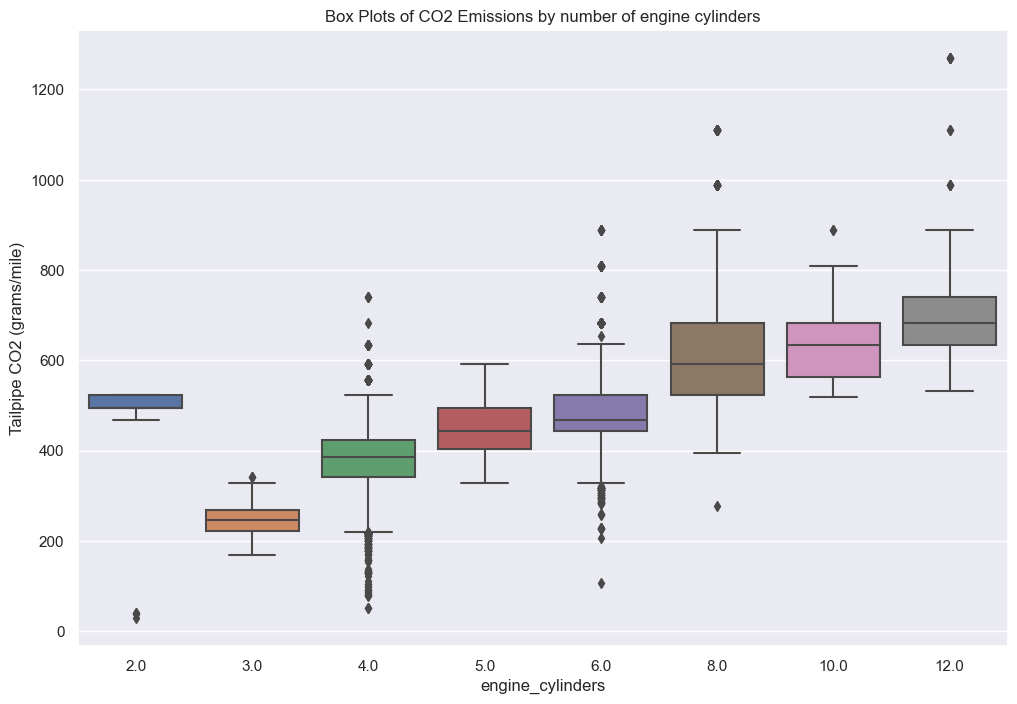

                        mean      median         std         IQR
engine_cylinders                                                
2.0               462.699336  493.722222  129.637152   29.042484
3.0               247.571211  246.861111   37.008620   47.128030
4.0               381.817191  386.391304   64.018172   81.382784
5.0               444.932709  444.350000   54.277991   89.767677
6.0               487.797351  467.736842   69.287281   78.414706
8.0               604.541588  592.466667  102.889833  160.850679
10.0              645.671481  634.785714   82.878670  119.615385
12.0              695.920691  683.615385  106.884911  105.797619


In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots
sb.boxplot(data=co2dataclean, x='engine_cylinders', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by number of engine cylinders')
plt.xlabel('engine_cylinders')
plt.ylabel('Tailpipe CO2 (grams/mile)')
plt.show()

# Prepare the data for analysis
grouped = co2dataclean.groupby('engine_cylinders')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

### Vehicles with 2 cylinders have an average (mean) CO2 emission of 462.70 grams per mile, with a median very close to the upper end of the IQR at 493.72 grams per mile, suggesting a skewed distribution. The standard deviation (std) is relatively large at 129.64, indicating a wide spread of emissions values for this category.

### 3-cylinder vehicles have significantly lower emissions, with a mean of 247.57 and a tight median of 246.86 grams per mile, reflecting less variability and lower emissions overall.

### As the number of cylinders increases from 4 to 12, both the mean and median values generally increase, indicating higher emissions for vehicles with more cylinders.

### 4-cylinder vehicles have a mean of 381.82 grams per mile, with a higher median indicating a slight skew towards higher emissions.

### 5-cylinder vehicles show a mean close to the median, around 444.93 grams per mile.

### For 6, 8, 10, and 12 cylinders, emissions progressively increase, with means of 487.80, 604.54, 645.67, and 695.92 grams per mile, respectively.

In [48]:
# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'engine_cylinders'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(engine_cylinders)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)


                           sum_sq       df            F  PR(>F)
C(engine_cylinders)  3.025481e+08      7.0  7335.712566     0.0
Residual             2.164854e+08  36743.0          NaN     NaN


### The ANOVA test results show a very high F-value (7335.71) and a p-value of 0.0 (which implies p < 0.001), indicating a very strong statistical significance. This means that there's almost certainly a significant difference in CO2 emissions among vehicles with different numbers of cylinders. The ANOVA test strongly rejects the null hypothesis that all cylinder groups have the same mean emissions.

## Conclusion
### The visualization and the ANOVA results together indicate that the number of engine cylinders in a vehicle is strongly associated with its CO2 emissions, with higher cylinder counts generally leading to higher emissions.

## Here we are comparing fuel_type with tailpipe_co2_in_grams_mile_ft1.

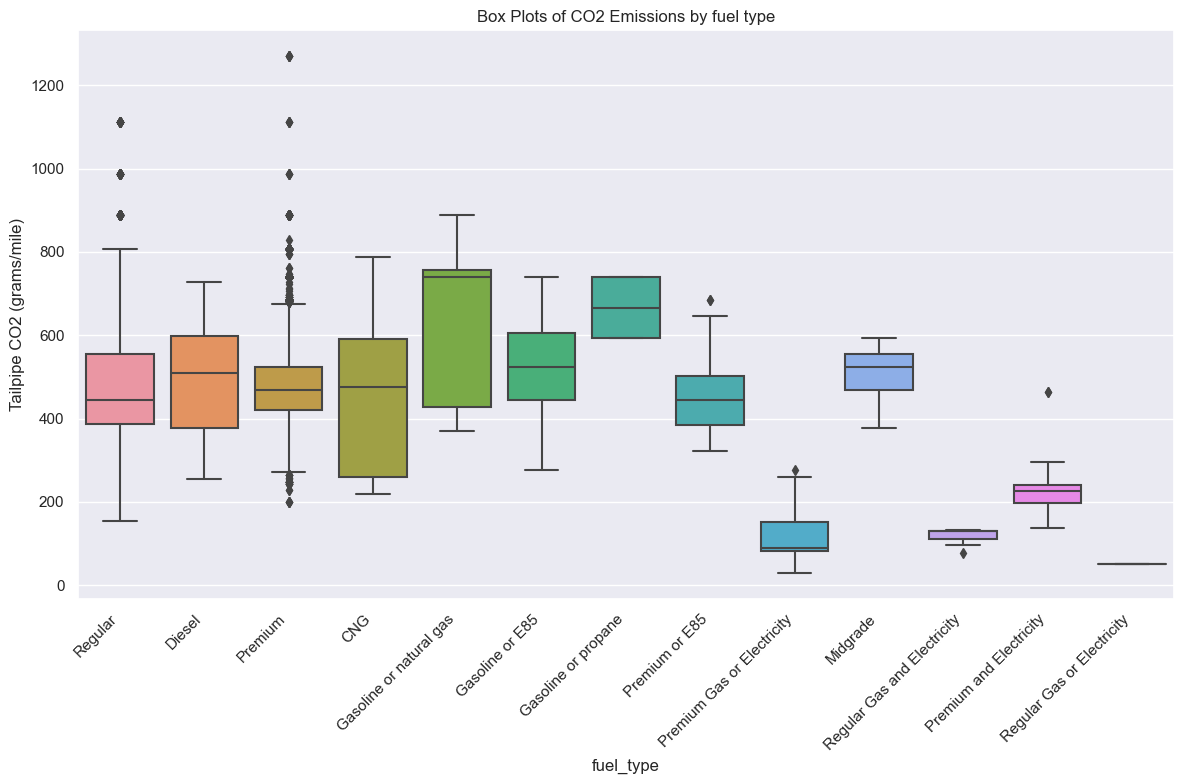

                                   mean      median         std         IQR
fuel_type                                                                  
CNG                          454.976354  476.817500  170.218778  330.563170
Diesel                       484.393967  509.000000  125.653916  221.786492
Gasoline or E85              525.390569  522.764706  101.537588  162.150000
Gasoline or natural gas      638.967778  740.583333  186.319046  328.676136
Gasoline or propane          666.525000  666.525000   79.171689  148.116667
Midgrade                     514.343924  523.000000   49.114566   87.700658
Premium                      479.830999  467.736842  108.310259  102.764706
Premium Gas or Electricity   120.055556   89.000000   85.057401   71.750000
Premium and Electricity      235.440000  227.000000   77.682087   43.000000
Premium or E85               460.464489  444.350000   93.658008  117.652174
Regular                      471.217479  444.350000  121.778053  169.046196
Regular Gas 

In [49]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots
sb.boxplot(data=co2dataclean, x='fuel_type', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by fuel type')
plt.xlabel('fuel_type')
plt.ylabel('Tailpipe CO2 (grams/mile)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align them to the right for better readability
plt.tight_layout()
plt.show()

# Prepare the data for analysis
grouped = co2dataclean.groupby('fuel_type')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

### CNG (Compressed Natural Gas) vehicles have a wide range of CO2 emissions, with a high standard deviation of 170.22, and a large IQR, indicating a high variability in emissions.

### Diesel vehicles have a higher median of 509.00 grams per mile than regular gasoline vehicles and a substantial standard deviation, suggesting varied emissions.

### Gasoline or E85 fuel vehicles have a mean and median around 525 grams per mile, with a relatively high standard deviation.

### Vehicles that can run on both Gasoline or natural gas show a high mean and a very high median, indicating that some configurations might have significantly higher emissions.

### The singular value for Gasoline or propane suggests a lack of variation in the data for this type, which may not be representative.

### Midgrade gasoline vehicles show a tighter spread of emissions, with a lower mean compared to regular gasoline.

### Premium fuel vehicles have a slightly higher mean emission value than regular gasoline but a lower median, indicating a distribution skewed by some vehicles with high emissions.

### The category Premium Gas or Electricity has the lowest mean CO2 emissions, significantly lower than the rest, indicating the impact of electric assistance.

### Regular Gas and Electricity also have very low emissions, with a small standard deviation, showing the benefits of hybrid technology.

### The singular value for Regular Gas or Electricity suggests that there's only one observation or very little variation for this fuel type in the dataset.


In [50]:
# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'fuel_type'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(fuel_type)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)


                    sum_sq       df          F         PR(>F)
C(fuel_type)  1.133250e+07     12.0  68.336377  6.794645e-166
Residual      5.077010e+08  36738.0        NaN            NaN


### The ANOVA results with a very large F-value (68.34) and an extremely small p-value (practically zero) suggest that there is a statistically significant difference in CO2 emissions among the different fuel types. The F-test shows that at least one fuel type has a significantly different mean CO2 emissions from the others.

## Conclusion
### The box plot and the ANOVA results together indicate a significant association between fuel type and CO2 emissions. Vehicles using premium gas or electricity, and regular gas and electricity, show substantially lower CO2 emissions, while those that can operate on gasoline or natural gas, and gasoline or propane, tend to have higher emissions. Hybrid electric vehicles significantly reduce CO2 emissions compared to traditional fuel types.

## Here we are comparing class with tailpipe_co2_in_grams_mile_ft1.

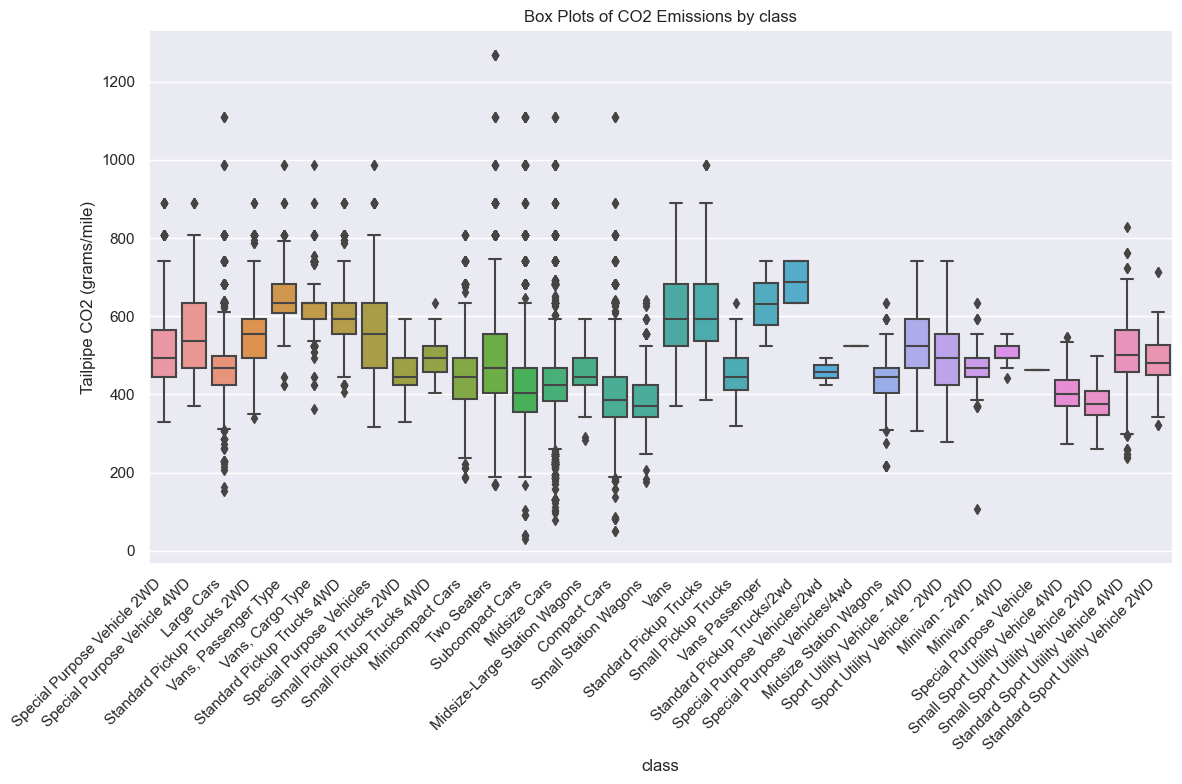

                                          mean      median         std  \
class                                                                    
Compact Cars                        397.269422  386.391304   82.956337   
Large Cars                          483.079398  467.736842   93.440027   
Midsize Cars                        433.325062  423.190476  101.395525   
Midsize Station Wagons              431.886733  444.350000   55.082757   
Midsize-Large Station Wagons        452.930656  444.350000   45.005794   
Minicompact Cars                    444.163311  444.350000   97.124928   
Minivan - 2WD                       468.105602  467.736842   44.268923   
Minivan - 4WD                       504.680806  493.722222   22.376205   
Small Pickup Trucks                 449.419450  444.350000   49.561325   
Small Pickup Trucks 2WD             452.697941  444.350000   51.102878   
Small Pickup Trucks 4WD             495.585294  493.722222   46.612152   
Small Sport Utility Vehicle 2WD     37

In [51]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots
sb.boxplot(data=co2dataclean, x='class', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by class')
plt.xlabel('class')
plt.ylabel('Tailpipe CO2 (grams/mile)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align them to the right for better readability
plt.tight_layout()
plt.show()

# Prepare the data for analysis
grouped = co2dataclean.groupby('class')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

### Compact Cars and Subcompact Cars have lower emissions, with medians around 386 and 404 grams per mile, respectively. They also have moderate variability in emissions.

### Midsize Cars and Midsize Station Wagons show similar median emissions, close to 423 grams per mile, indicating they're generally more efficient than larger vehicles.

### The emissions for Minivans (both 2WD and 4WD) range in the middle, with slightly higher medians around 467 and 494 grams per mile.

### Small Sport Utility Vehicles (SUVs), both 2WD and 4WD, have relatively lower emissions compared to standard SUVs, with medians at 376 and 402 grams per mile.

### Standard Pickup Trucks and Vans (cargo and passenger types) have some of the highest CO2 emissions, with medians well above 590 grams per mile.

### Special Purpose Vehicles, depending on their drive type (2WD or 4WD), also show higher emissions.

In [52]:
# Rename the 'class' column to 'vehicle_class' to avoid using a Python keyword
co2dataclean.rename(columns={'class': 'vehicle_class'}, inplace=True)

# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'vehicle_class'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(vehicle_class)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)

                        sum_sq       df           F  PR(>F)
C(vehicle_class)  1.954999e+08     33.0  672.326876     0.0
Residual          3.235336e+08  36717.0         NaN     NaN


### A very high F-value (672.33), suggesting a strong statistical significance.
### A p-value of 0.0, which means the probability that these differences in means are due to random chance is extremely low.


## Conclusion 
### As vehicles increase in size and capacity, their CO2 emissions tend to increase, with some variability depending on specific class design and purpose. The ANOVA results confirm that these differences are statistically significant, meaning that vehicle class is a determinant factor in CO2 emissions.

## Here we are comparing transmission with tailpipe_co2_in_grams_mile_ft1.

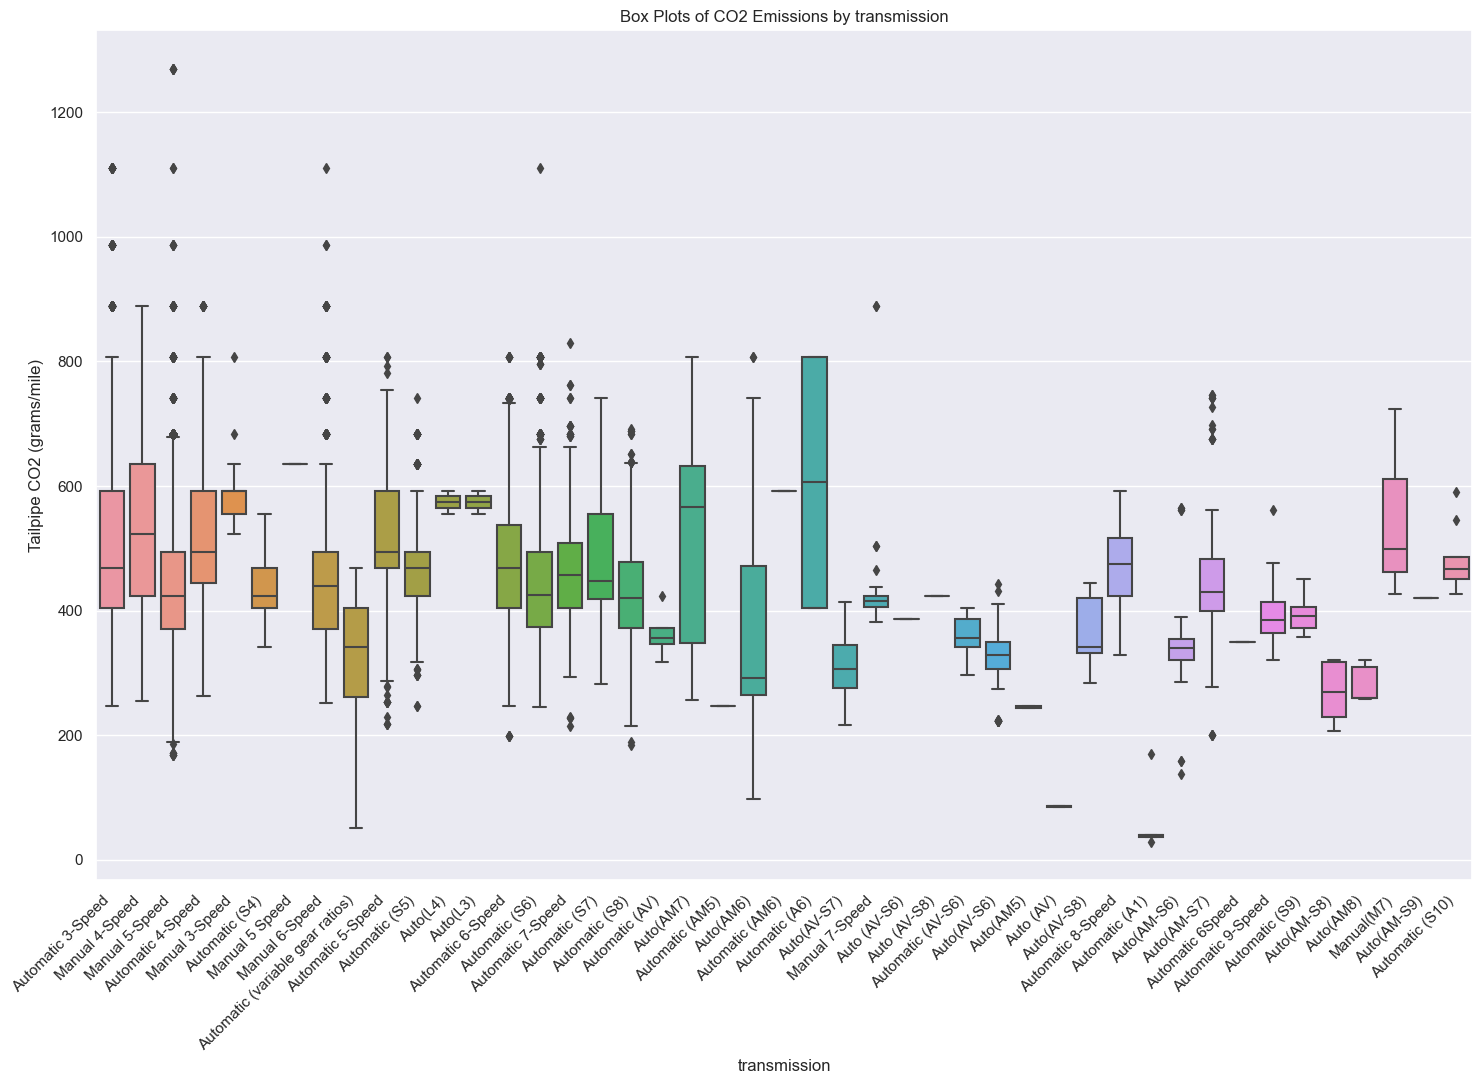

                                        mean      median         std  \
transmission                                                           
Auto (AV)                          85.500000   85.500000    2.121320   
Auto (AV-S6)                      386.391304  386.391304         NaN   
Auto (AV-S8)                      423.190476  423.190476         NaN   
Auto(AM-S6)                       341.079434  340.000000   64.851570   
Auto(AM-S7)                       449.211756  430.000000   91.661947   
Auto(AM-S8)                       269.166667  269.000000   53.248161   
Auto(AM-S9)                       420.000000  420.000000         NaN   
Auto(AM5)                         245.263889  245.430556    1.704186   
Auto(AM6)                         367.765458  292.000000  156.161674   
Auto(AM7)                         523.602996  567.000000  143.524698   
Auto(AM8)                         281.600000  260.000000   30.794480   
Auto(AV-S6)                       326.441480  328.000000   43.55

In [53]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 11))

# Create boxplots
sb.boxplot(data=co2dataclean, x='transmission', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by transmission')
plt.xlabel('transmission')
plt.ylabel('Tailpipe CO2 (grams/mile)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align them to the right for better readability
plt.tight_layout()
plt.show()

# Prepare the data for analysis
grouped = co2dataclean.groupby('transmission')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

### Auto(AM7) has a high mean CO2 emission of 523.60 grams per mile and a median of 567.00 grams per mile, with a large standard deviation of 143.52, indicating considerable variability within this transmission type.

### Automatic (A6) shows a very high median emission of 605.93 grams per mile, which is notable as it is one of the highest among the transmissions. The standard deviation here is also quite high at 233.22, suggesting a wide range of emission values.

### Manual 3-Speed transmissions have a median CO2 emission close to that of some automatics at 592.47 grams per mile, which is high compared to many other transmission types.

### Manual 4-Speed transmissions have a median emission of 522.76 grams per mile and a very high standard deviation of 147.62, indicating a spread of emissions values possibly due to variations in vehicle types using this transmission.

### Auto (AV) is on the lower end with an average CO2 emission of only 85.50 grams per mile and an extremely low standard deviation of 2.12, showing very little variability in emissions for this transmission type.

In [54]:
# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'transmission'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(transmission)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)

                       sum_sq       df           F  PR(>F)
C(transmission)  7.762048e+07     44.0  146.695079     0.0
Residual         4.414130e+08  36706.0         NaN     NaN


### The F-value is extremely high at 146.70, which is significant in suggesting differences in emissions across transmission types.

### The p-value is essentially zero, confirming that these differences are statistically significant.

## Conclusion:
### These specific values and the ANOVA test results indicate that transmission type is a significant factor in determining CO2 emissions from vehicles, with some older or less complex automatic transmissions and manual transmissions exhibiting higher emissions.

## Here we are comparing drive with tailpipe_co2_in_grams_mile_ft1.

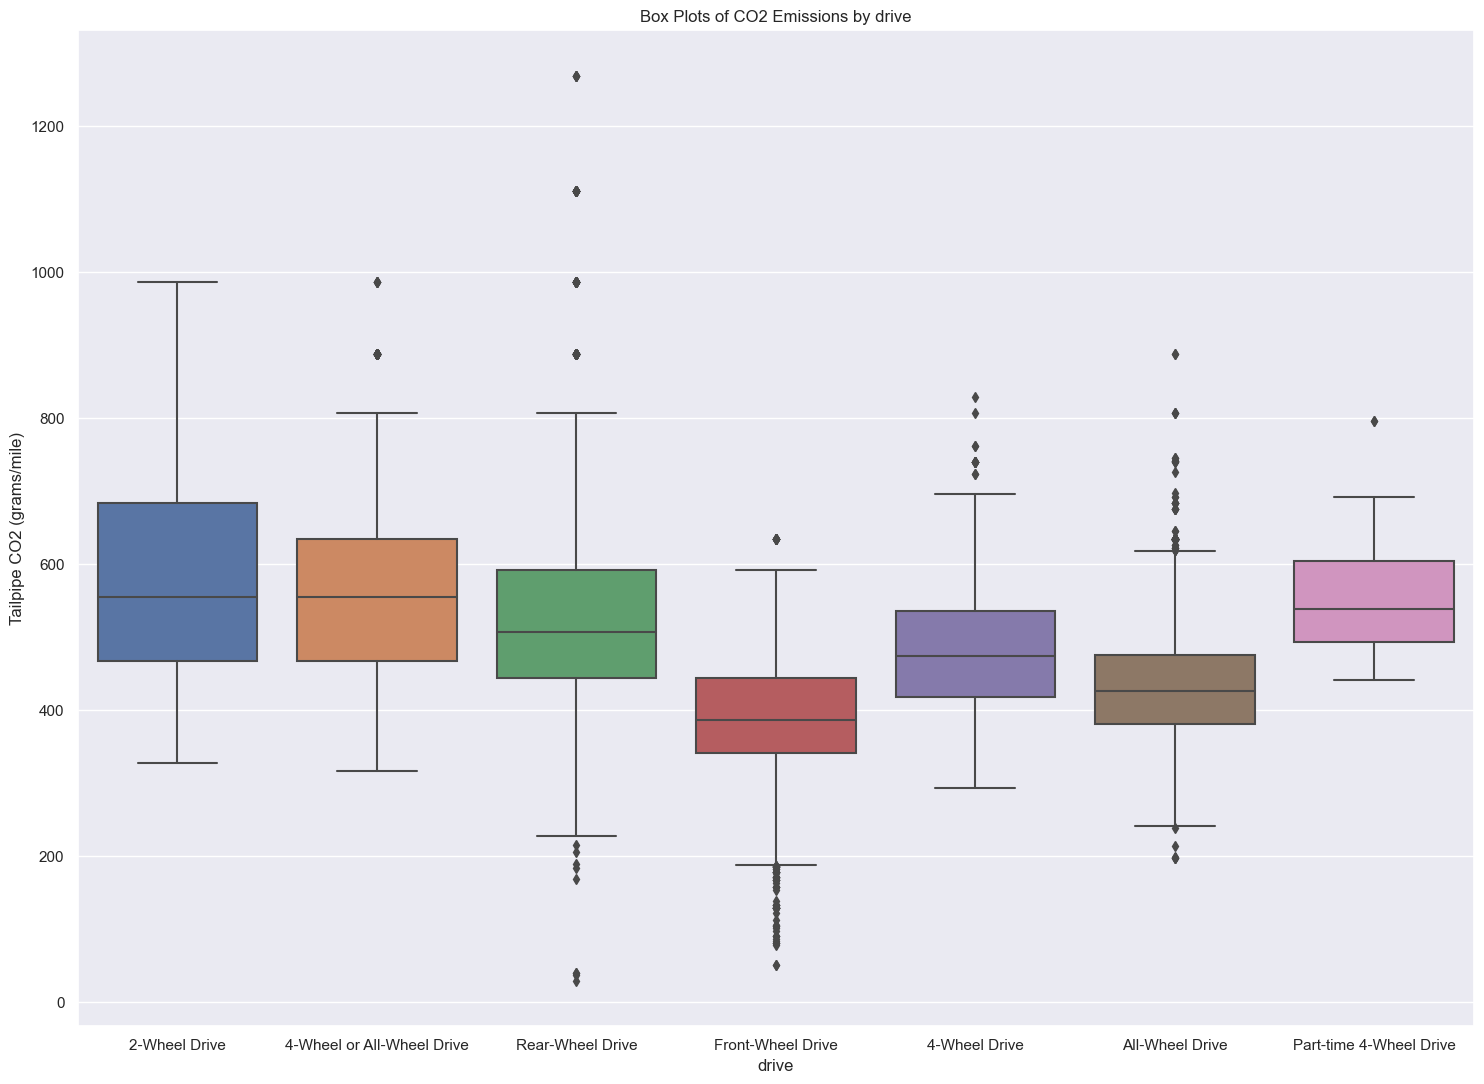

                                  mean      median         std         IQR
drive                                                                     
2-Wheel Drive               564.633684  555.437500  135.915323  215.878542
4-Wheel Drive               483.077484  474.000000   88.301387  118.000000
4-Wheel or All-Wheel Drive  552.232677  555.437500  105.605390  167.048872
All-Wheel Drive             437.457744  426.000000   84.645497   95.000000
Front-Wheel Drive           385.667119  386.391304   67.666094  102.542308
Part-time 4-Wheel Drive     550.850446  539.000000   75.508434  111.208333
Rear-Wheel Drive            528.956296  507.000000  110.816722  148.116667


In [55]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 11))

# Create boxplots
sb.boxplot(data=co2dataclean, x='drive', y='tailpipe_co2_in_grams_mile_ft1')
plt.title('Box Plots of CO2 Emissions by drive')
plt.xlabel('drive')
plt.ylabel('Tailpipe CO2 (grams/mile)')
# Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

# Prepare the data for analysis
grouped = co2dataclean.groupby('drive')['tailpipe_co2_in_grams_mile_ft1']

# Calculate statistics
stats = grouped.agg(['mean', 'median', 'std'])
stats['IQR'] = grouped.quantile(0.75) - grouped.quantile(0.25)

# Output the results
print(stats)

### 2-Wheel Drive vehicles have a relatively high mean CO2 emission value of 564.63 grams/mile and a median of 555.44 grams/mile, with a notably wide IQR of 215.88 grams/mile, indicating a large spread between the 25th and 75th percentiles.

### All-Wheel Drive vehicles show a lower mean of 437.46 grams/mile and a median of 426.00 grams/mile, with a smaller IQR of 95.00 grams/mile, suggesting less variability and generally lower emissions than 2-wheel drive vehicles.

### Front-Wheel Drive vehicles have the lowest mean emissions of 385.67 grams/mile and a median very close to the mean at 386.39 grams/mile, along with a moderate IQR of 102.54 grams/mile.

In [56]:
# Define the model: ANOVA for 'tailpipe_co2_in_grams_mile_ft1' based on 'drive'
model = ols('tailpipe_co2_in_grams_mile_ft1 ~ C(drive)', data=co2dataclean).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the results
print(anova_results)

                sum_sq       df            F  PR(>F)
C(drive)  1.914663e+08      6.0  3579.539002     0.0
Residual  3.275672e+08  36744.0          NaN     NaN


### The F-value is extremely high at 3579.54, indicating a very strong association between drive type and CO2 emissions.
### The p-value is effectively zero, demonstrating that the observed differences are statistically significant.

## Conclusion 
### Drive type is a significant factor in vehicle CO2 emissions, with 2-wheel drive vehicles typically having higher emissions and front-wheel drive vehicles having lower emissions. All-wheel drive vehicles also tend to have lower emissions than 2-wheel and part-time 4-wheel drive vehicles, although they emit more on average than front-wheel drive vehicles. The ANOVA results strongly support the conclusion that these differences are not due to chance.

# Machine Learning

## We start by doing a linear regression of engine displacement on tailpipe_co2_in_grams_mile_ft1

In [69]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# Split the engine_displacement-tailpipe_co2_in_grams_mile_ft1 Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(engineDisp, co2_emissions, test_size = 0.25,random_state = 42)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (27563, 1) (27563, 1)
Test Set  : (9188, 1) (9188, 1)


In [70]:
# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

In [71]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [240.53842226]
Coefficients 	: a =  [[70.3838908]]


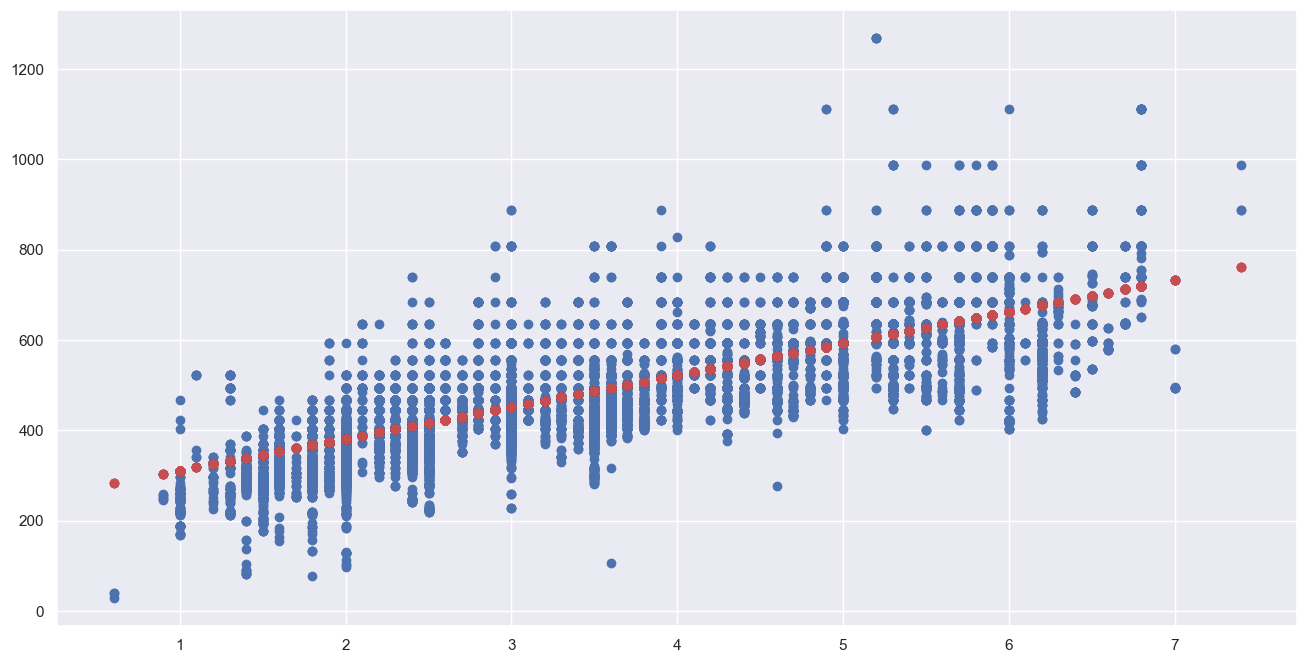

In [72]:
# Predict Total values corresponding to HP Train
total_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, total_train_pred, color = "r")
plt.show()

## Comments 
### The linear regression model plotted above has a intercept of approximately 240, which suggests that in a hypothetical scenario where there is no engine displacement the amount of carbon dioxide is about 240g. However, this is rather not meaningful. More importantly, the coefficient of the model is about 70.4 suggesting a positive trend where as the engine displacement of a vehicle increases the carbon dioxide emissions per mile from the tailpipe also increases. For every 1 litre increase in engine displacement, there is approximately 70g increase in the amount of carbon dioxide released per mile for a vehicle as predicted by our model.Many data points with a lower engine displacement(from about 1 to 2) lie very close to the regression line suggesting that the linear model may be very accurate for lower engine displacement, in the case of the train data.

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [73]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(X_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.646120932048381
Mean Squared Error (MSE) 	: 231002.1694960894
Root Mean Squared Error (RMSE) 	: 480.6268505775446


# Interpretation and Comments:

### 1 Explained Variance (R²): According to the model, approximately 64.61% of the variance in carbon dioxide emissions can be explained by engine displacement for the train set.However, there is still some unexplained variability in SalePrice, possibly due to other factors like class, drive etc.

### 2 Mean Squared Error (MSE): The mean squared error (MSE) is approximately 235966.996. MSE represents the average of the squared differences between the actual and predicted values. In this case, the average squared difference between the observed and predicted values of the response variable, co2 emissions from tailpipe per mile, is approximately 235966.996.

### 3 Root Mean Squared Error (RMSE): The root mean squared error (RMSE) is approximately 485.764. RMSE represents the standard deviation of the residuals, which are the differences between the observed and predicted values. In this case, the RMSE indicates that, on average, the predicted values differ from the actual values by approximately 485.764 units.

## Conclusion:
### The model explains a moderate amount of variance in the response variable (64.61%), suggesting that the predictor variables have some predictive power.
 ### However, the relatively high MSE and RMSE indicate that the model's predictions have a considerable amount of error. This suggests that there may be room for improvement in the model's accuracy.

## Test Set

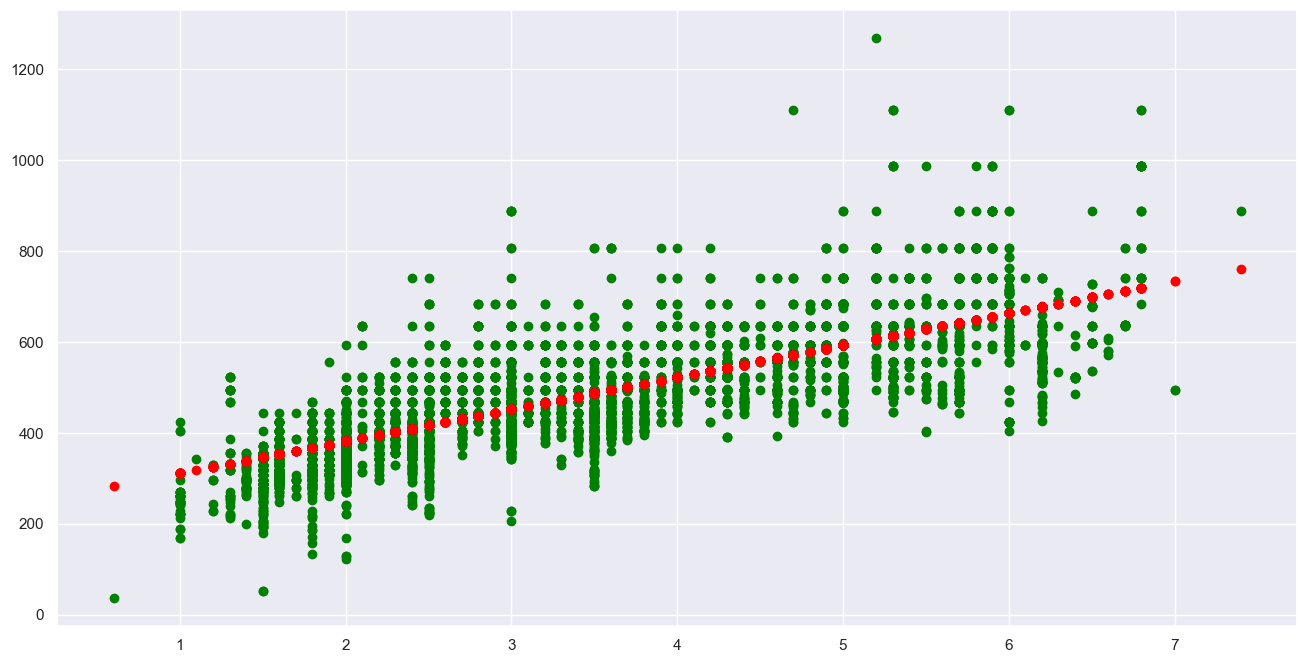

In [74]:
# Predict Total values corresponding to Engine Displacement Test
total_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, total_test_pred, color = "red")
plt.show()

In [63]:

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

mse = mean_sq_err(X_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.6343515129630459
Mean Squared Error (MSE) 	: 238602.19794786946
Root Mean Squared Error (RMSE) 	: 488.46923951040094


In [78]:
print("Difference in MSE\t:",  mean_sq_err(X_train, total_train_pred) - mean_sq_err(X_test, total_test_pred))

Difference in MSE	: -1270.8093533039792


## 1 Explained Variance (R²): According to the model, approximately 63.44% of the variance in carbon dioxide emissions can be explained by engine displacement for the test set.However, there is still some unexplained variability in SalePrice, possibly due to other factors like class, drive etc.

##  2 Mean Squared Error (MSE): The mean squared error (MSE) for the test data is approximately 238602.20.The average squared difference between the observed and predicted values of the response variable is approximately 238602.20.
## 3 Root Mean Squared Error (RMSE): The root mean squared error (RMSE) for the test data is approximately 488.47. The RMSE indicates that, on average, the predicted values differ from the actual values by approximately 488.47 units## .
## Conclusion
 ### • The model explains a moderate amount of variance in the response variable (63.44%), suggesting that the predictor variables have some predictive powe###.
 ### • However, the relatively high MSE and RMSE indicate that the model's predictions for the test data have a considerable amount of error. This suggests that there may be room for improvement in the model's accuracy.
 ### • Overall, while the model provides some valuable insights into the relationship between the predictor variables and the response variable, further refinement or additional variables may be necessary to improve its predictive performance.

 ### MSE is a good measure of prediction accuracy since it explains the difference between observed values and predicted values.The MSE for train set and for test set are quite close in values as shown by the difference in both MSEs (1270.80935) which suggests that the model,derived from the train set, has relatively good predictions on the test set.

# Logistic regression Model for categorical variables against CO2 emission

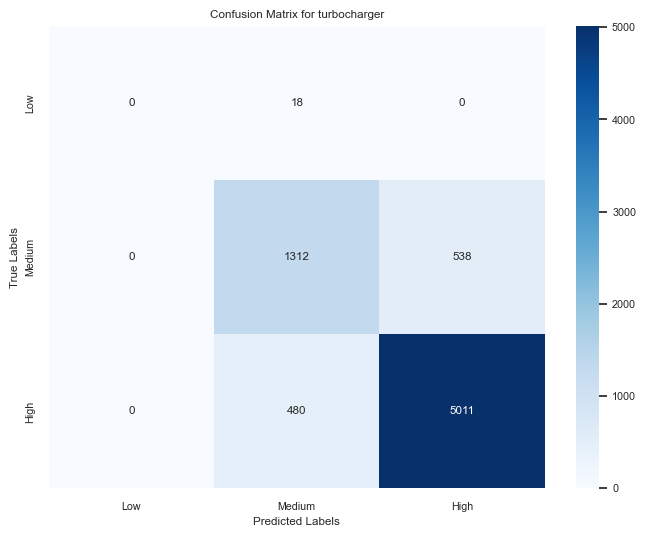

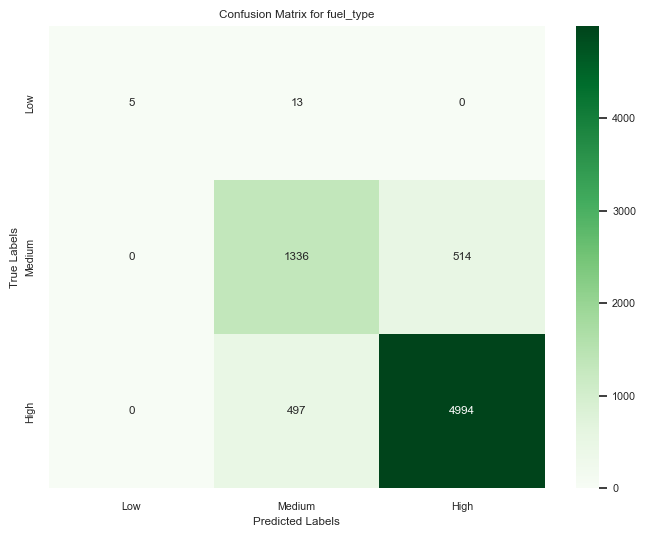

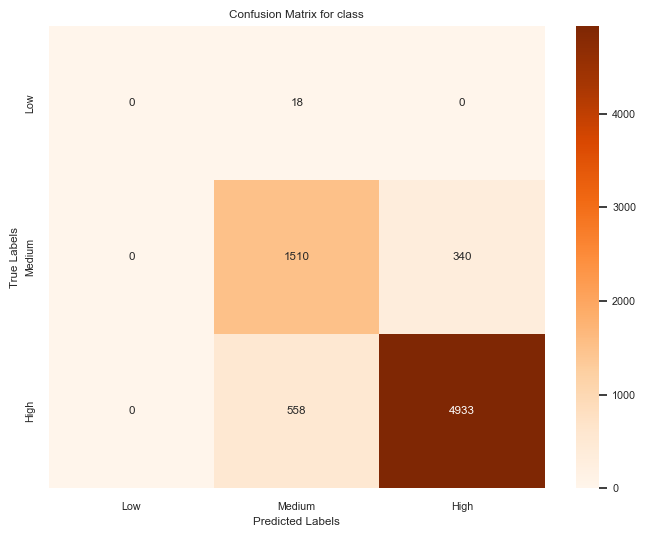

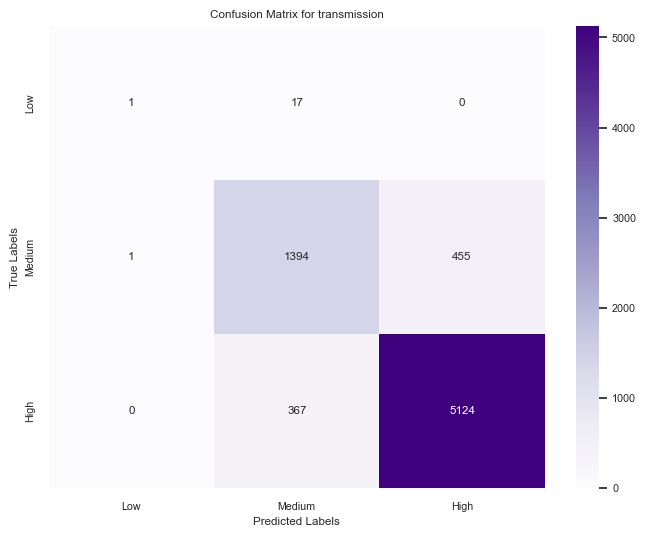

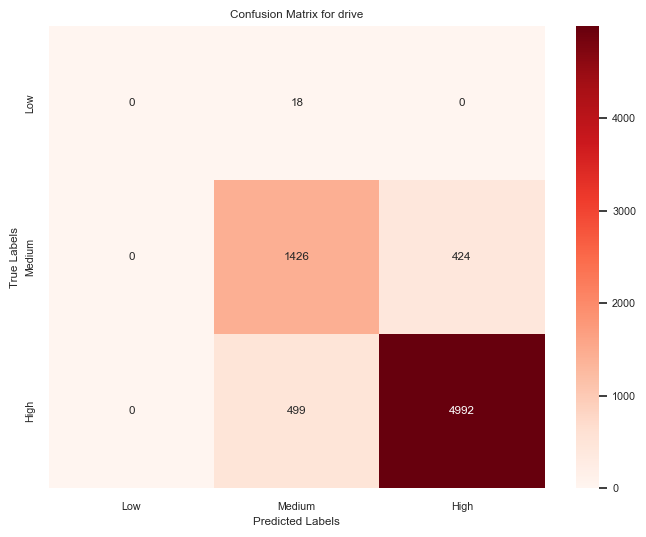

Results for turbocharger:
Accuracy: 0.8592


Results for fuel_type:
Accuracy: 0.8609


Results for class:
Accuracy: 0.8755


Results for transmission:
Accuracy: 0.8859


Results for drive:
Accuracy: 0.8721


The variable with the best classification accuracy is: transmission


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
data = pd.read_csv('cleanedco2data.csv')

# Categorize CO2 emissions into bins for classification
data['CO2_category'] = pd.cut(data['tailpipe_co2_in_grams_mile_ft1'], bins=[0, 200, 400, np.inf], labels=['Low', 'Medium', 'High'])

# List of all categorical variables to be analyzed
categorical_vars = ['turbocharger', 'fuel_type', 'class', 'transmission', 'drive']

# Define a list of color palettes
color_palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds']

# Initialize dictionary to store results
results = {}

for index, var in enumerate(categorical_vars):
    # One-hot encode the current categorical variable, but include all other non-categorical data.
    non_categorical_data = data.select_dtypes(exclude=['object'])
    data_subset = pd.concat([data[var], non_categorical_data], axis=1)
    data_encoded = pd.get_dummies(data_subset, columns=[var])

    # Define features and target for classification
    X = data_encoded.drop(['tailpipe_co2_in_grams_mile_ft1', 'CO2_category'], axis=1)
    y_class = data_encoded['CO2_category']

    # Split data for the model
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

    # Logistic regression for confusion matrix
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    logistic_model.fit(X_train, y_train_class)
    y_pred_class = logistic_model.predict(X_test)
    cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High'])
    acc = accuracy_score(y_test_class, y_pred_class)

    # Store results
    results[var] = {'Confusion Matrix': cm, 'Accuracy': acc}

    # Plotting confusion matrix
    palette = color_palettes[index % len(color_palettes)]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {var}')
    plt.show()

# Print results
for var, metrics in results.items():
    print(f"Results for {var}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("\n")

# Find the variable with the highest accuracy
best_variable = max(accuracies, key=accuracies.get)
print(f"The variable with the best classification accuracy is: {best_variable}")



## Turbocharger:
### High predictive accuracy for 'High' CO2 emissions category.
### Inability to identify any 'Low' CO2 emissions, possibly indicating a strong association between turbochargers and higher emissions.
### No false negatives in the 'High' category, but considerable false positives where 'Low' is predicted as 'Medium'.

## Fuel Type:
### Very good at predicting 'High' CO2 emissions, suggesting a strong link between fuel type and emissions.
### Some correct predictions in 'Low' emissions, but with a tendency to over-predict the 'Medium' category.

## Class:
### Highly accurate for 'High' emissions, with the most misclassifications occurring between 'Medium' and 'High' emissions.
### Like the others, the model rarely correctly predicts the 'Low' emissions category.

## Transmission:
### Excellently predicts 'High' CO2 emissions but struggles with distinguishing 'Medium' from 'High' emissions.
### Marginally better at identifying 'Low' emissions compared to other variables, but still largely inaccurate for this category.

## Drive:
### Similarly proficient at predicting 'High' emissions.
### Misclassifies 'Medium' as 'High' emissions significantly, indicating potential overfitting to 'High' emissions characteristics.

## Overall Conclusions:
### The models consistently excel at identifying 'High' CO2 emissions categories, which implies that factors contributing to high emissions are more distinguishable within the given dataset.
### There is a general difficulty in accurately predicting 'Low' and 'Medium' CO2 emission categories, with these often being misclassified as 'High'. This could be indicative of class imbalance or less distinctive features for these categories.
### A notable pattern is the high false positive rate for predicting the 'High' emissions category, suggesting a potential model bias towards this class, possibly due to it being overrepresented in the dataset.
### The 'Low' emissions category is rarely predicted correctly, indicating that the features may not be sufficiently representative or the model may not be capturing the necessary complexity to distinguish this class.

## from this model we can conclude that the variable with the best classification accuracy is transmission with an accuracy value of 88.5%

# Gradient Boosting Model for categorical variables against CO2 emission (GBM)

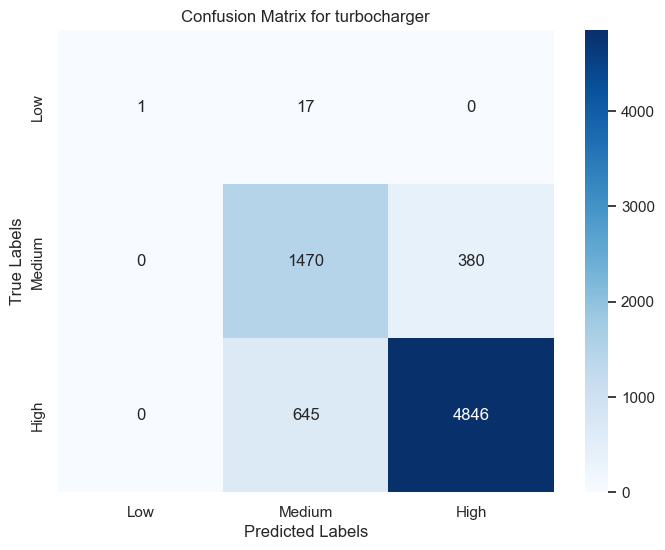

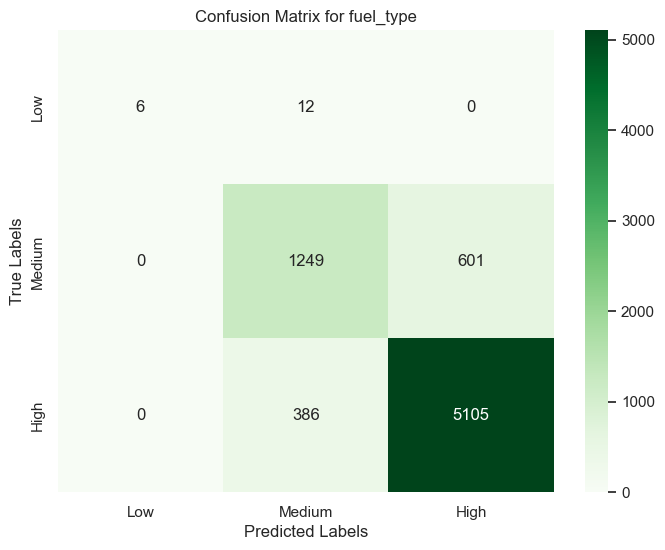

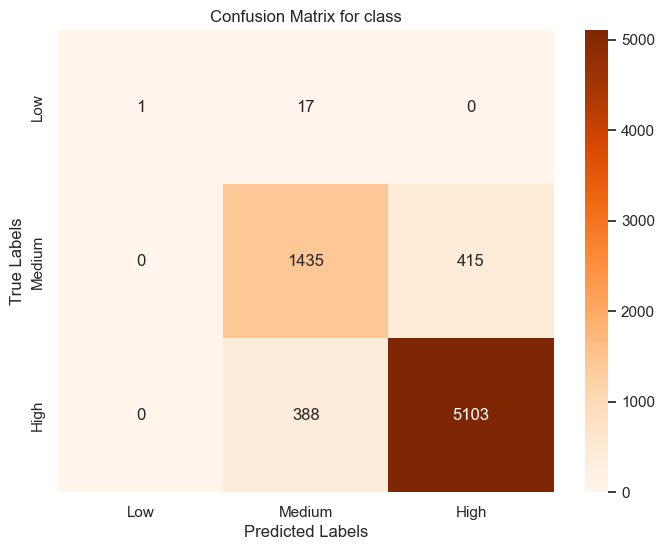

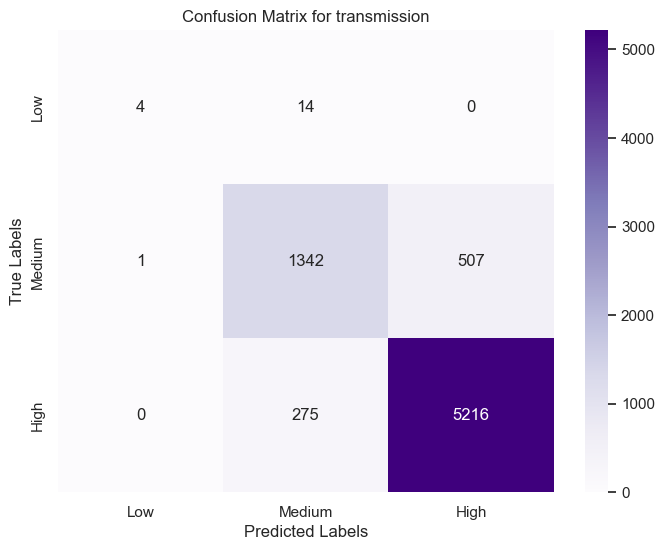

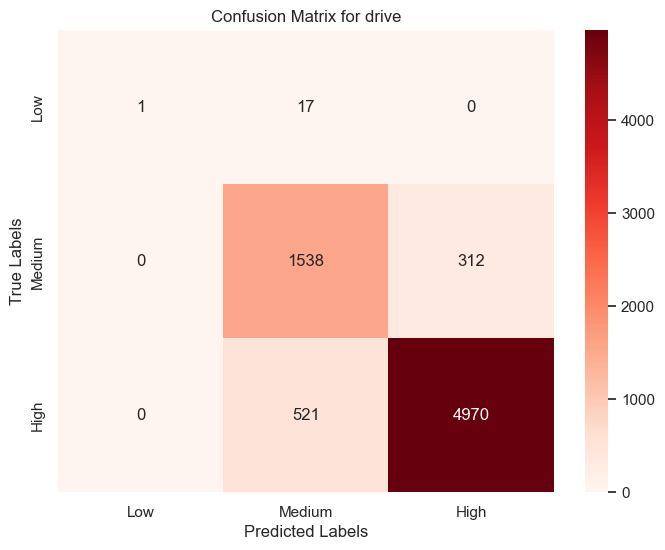

Results for turbocharger:
Accuracy: 0.8584046745481723
  Range for No: 85.68356216688618 - 1032.3064256673797
  Range for True: 250.9408614736612 - 841.0820078663684


Results for fuel_type:
Accuracy: 0.8642478597635548
  Range for Regular: 251.39959048359535 - 939.0024651134132
  Range for Diesel: 303.180353196126 - 641.506363575483
  Range for Premium: 253.652199633983 - 925.2106207686793
  Range for CNG: 288.5959515942754 - 626.3897024270418
  Range for Gasoline or natural gas: 396.14106226822133 - 713.0382000388466
  Range for Gasoline or E85: 372.5309536431707 - 610.7063850243984
  Range for Gasoline or propane: No data - No data
  Range for Premium or E85: 371.53475793067184 - 641.1721419733834
  Range for Premium Gas or Electricity: 62.01117723241763 - 305.60347879969294
  Range for Midgrade: 540.7731036819049 - 540.7731036819049
  Range for Regular Gas and Electricity: 157.12793380992483 - 157.12793380992483
  Range for Premium and Electricity: 252.28540548450212 - 444.99299465

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Load data
data = pd.read_csv('cleanedco2data.csv')

# Categorize CO2 emissions into bins for classification
data['CO2_category'] = pd.cut(data['tailpipe_co2_in_grams_mile_ft1'], bins=[0, 200, 400, np.inf], labels=['Low', 'Medium', 'High'])

# List of all categorical variables to be analyzed
categorical_vars = ['turbocharger', 'fuel_type', 'class', 'transmission', 'drive']

# Define a list of color palettes
color_palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds']

# Initialize dictionary to store results
results = {}

for index, var in enumerate(categorical_vars):
    # One-hot encode the current categorical variable, but include all other non-categorical data.
    non_categorical_data = data.select_dtypes(exclude=['object'])
    data_subset = pd.concat([data[var], non_categorical_data], axis=1)
    data_encoded = pd.get_dummies(data_subset, columns=[var])

    # Define features and target for classification and regression
    X = data_encoded.drop(['tailpipe_co2_in_grams_mile_ft1', 'CO2_category'], axis=1)
    y_class = data_encoded['CO2_category']
    y_regress = data_encoded['tailpipe_co2_in_grams_mile_ft1']

    # Split data for both models
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
    _, _, y_train_regress, y_test_regress = train_test_split(X, y_regress, test_size=0.2, random_state=42)

    # Classifier for confusion matrix
    classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    classifier.fit(X_train, y_train_class)
    y_pred_class = classifier.predict(X_test)
    cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Medium', 'High'])
    acc = accuracy_score(y_test_class, y_pred_class)

    # Regressor for predicted range
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train_regress)
    y_pred_regress = regressor.predict(X_test)

    # Calculate predicted range for each category within the variable
    category_ranges = {}
    for category in data[var].unique():
        category_column = f"{var}_{category}"
        if category_column in X_test.columns:
            category_mask = X_test[category_column].astype(bool)
            if category_mask.any():
                category_y_pred = y_pred_regress[category_mask]
                min_pred, max_pred = np.min(category_y_pred), np.max(category_y_pred)
                category_ranges[category] = (min_pred, max_pred)
            else:
                category_ranges[category] = ('No data', 'No data')

    # Store results
    results[var] = {'Confusion Matrix': cm, 'Accuracy': acc, 'Predicted Ranges': category_ranges}

    # Plotting confusion matrix
    palette = color_palettes[index % len(color_palettes)]
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap=palette, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {var}')
    plt.show()

# Print results
for var, metrics in results.items():
    print(f"Results for {var}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    for category, range_values in metrics['Predicted Ranges'].items():
        print(f"  Range for {category}: {range_values[0]} - {range_values[1]}")
    print("\n")


# Comments and Explanation

## Drive Confusion Matrix:

### Correct Classification: The majority of 'Medium' and 'High' classifications are correct.
### Misclassification: There is a noticeable number of vehicles classified as 'Medium' when they should be 'High' (312 instances).
### Low Sample Size: 'Low' drive has very few samples, so the model's ability to predict this class is limited (only 1 correct).

## Transmission Confusion Matrix:
### Correct Classification: Most vehicles are correctly classified in the 'High' category.
### Misclassification: The model struggles with the 'Medium' category, tending to predict as 'High' (507 instances).
### Low Sample Size: Very few instances of 'Low' transmission, with the model misclassifying some 'Low' as 'Medium' (14 instances).

## Class Confusion Matrix:
### Correct Classification: 'High' class has a high number of correct classifications.
### Misclassification: 'Medium' class again shows misclassification issues, with a significant number predicted as 'High' (415 instances).
### Good Distinction: The model did not confuse 'High' with 'Medium' or 'Low'.

## Fuel Type Confusion Matrix:
### Correct Classification: 'High' fuel type classification is predominantly correct.
### Misclassification: There are considerable misclassifications from 'Medium' to 'High' (601 instances), indicating confusion between these classes.
### Low Prediction Accuracy: The 'Low' fuel type category has a small number of correct predictions, and some misclassification as 'Medium' (12 instances).

## Turbocharger Confusion Matrix:
### Correct Classification: A large number of 'High' classifications are correct.
### Misclassification: The 'Medium' category is the most misclassified, with a significant number predicted as 'High' (380 instances).
### Minimal Data for Low: Only one correct prediction for 'Low', and some 'Low' are confused as 'Medium' (17 instances).

### In summary, the model's performance is best in distinguishing 'High' categories across all features, while 'Medium' categories are more prone to misclassification as 'High'. The 'Low' category often suffers from a low sample size of vehicles, leading to less reliable predictions.

In [81]:
import numpy as np

confusion_matrices = {
    'drive': np.array([[1, 17, 0], [0, 1538, 312], [0, 521, 4970]]),
    'transmission': np.array([[4, 14, 0], [1, 1342, 507], [0, 275, 5216]]),
    'class': np.array([[1, 17, 0], [0, 1435, 415], [0, 388, 5103]]),
    'fuel_type': np.array([[6, 12, 0], [0, 1249, 601], [0, 386, 5105]]),
    'turbocharger': np.array([[1, 17, 0], [0, 1470, 380], [0, 645, 4846]])
}

# Calculate classification accuracy for each variable
accuracies = {}
for variable, cm in confusion_matrices.items():
    accuracy = np.diag(cm).sum() / cm.sum()
    accuracies[variable] = accuracy

# Output the accuracy for each variable
for variable, accuracy in accuracies.items():
    print(f"Accuracy for {variable}: {accuracy:.2f}")

# Find the variable with the highest accuracy
best_variable = max(accuracies, key=accuracies.get)
print(f"The variable with the best classification accuracy is: {best_variable}")

Accuracy for drive: 0.88
Accuracy for transmission: 0.89
Accuracy for class: 0.89
Accuracy for fuel_type: 0.86
Accuracy for turbocharger: 0.86
The variable with the best classification accuracy is: transmission


### The classification accuracy rates provided reflect how well each variable predicts certain outcomes. "Class" and "Transmission" lead with the highest accuracy at approximately 89%, suggesting they are the most reliable predictors among those listed. "Drive" follows closely at around 88%. "Fuel_type" and "Turbocharger" trail with accuracy rates near 86% and 85%, respectively. These figures indicate that while all the variables are relatively good predictors, "Class" and "Tranmission" are the best indicators of the outcome.

# Support Vector Machines (SVM) for categorical variables against CO2 emission

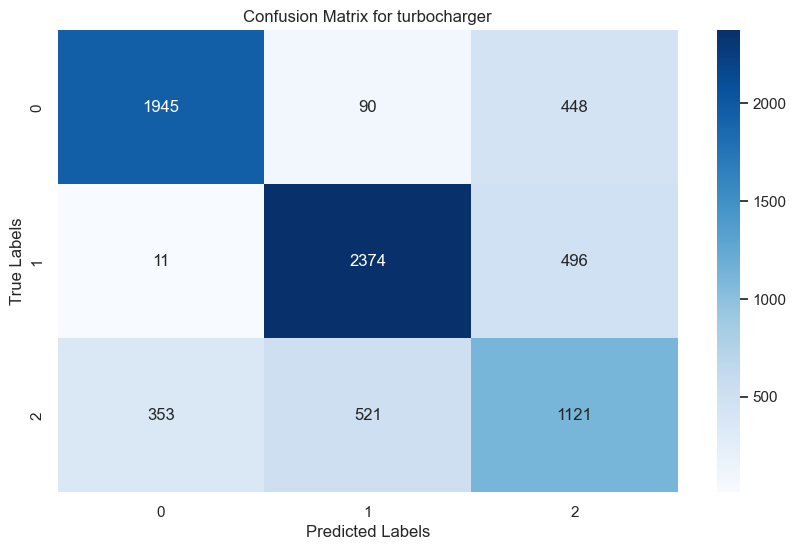

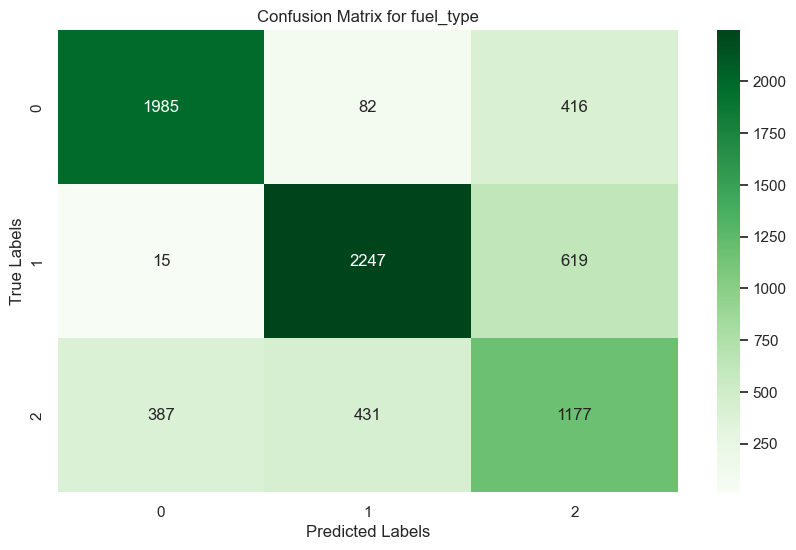

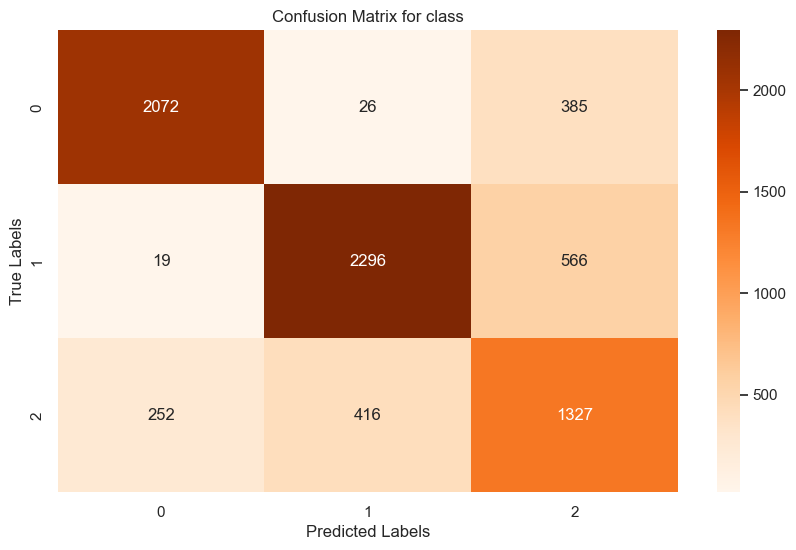

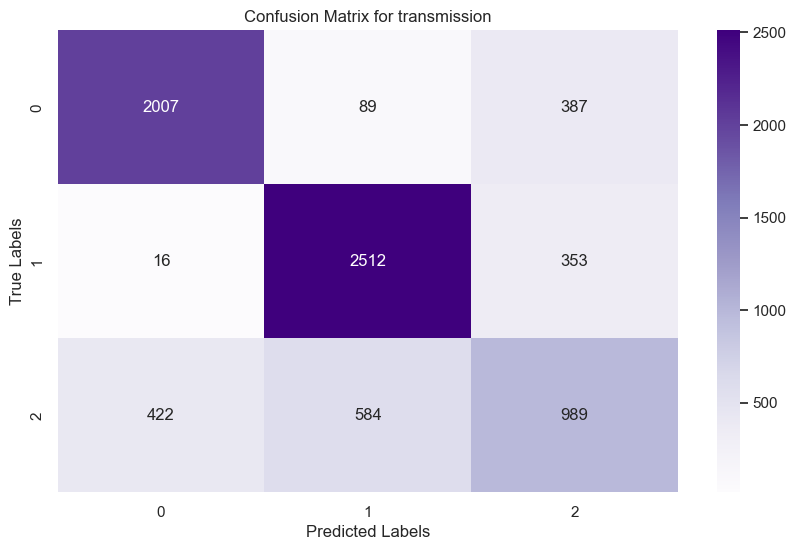

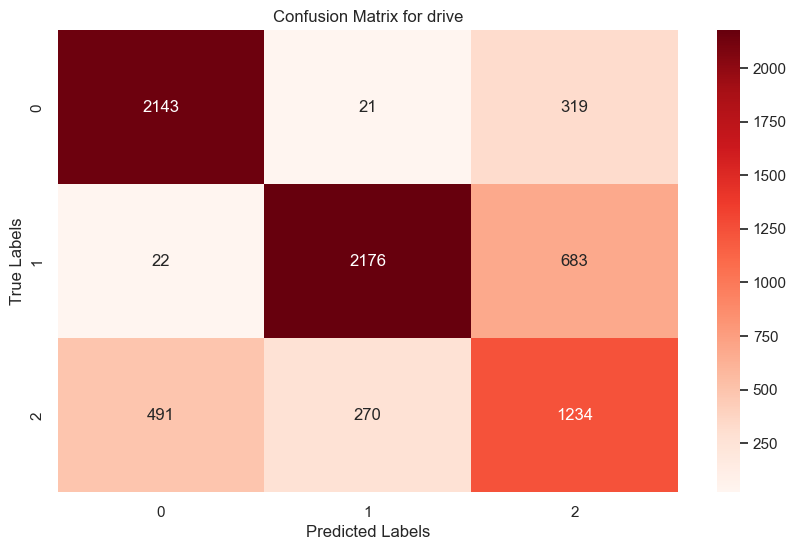

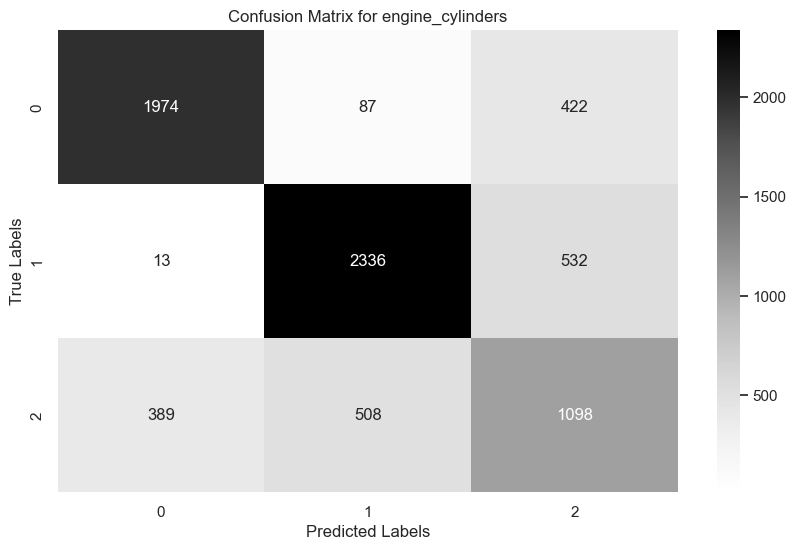

Results for turbocharger:
              precision    recall  f1-score   support

        High       0.84      0.78      0.81      2483
         Low       0.80      0.82      0.81      2881
      Medium       0.54      0.56      0.55      1995

    accuracy                           0.74      7359
   macro avg       0.73      0.72      0.72      7359
weighted avg       0.74      0.74      0.74      7359



Results for fuel_type:
              precision    recall  f1-score   support

        High       0.83      0.80      0.82      2483
         Low       0.81      0.78      0.80      2881
      Medium       0.53      0.59      0.56      1995

    accuracy                           0.74      7359
   macro avg       0.73      0.72      0.72      7359
weighted avg       0.74      0.74      0.74      7359



Results for class:
              precision    recall  f1-score   support

        High       0.88      0.83      0.86      2483
         Low       0.84      0.80      0.82      2881
   

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

# Load data
data = pd.read_csv('cleanedco2data.csv')

# Discretize tailpipe CO2 emissions into 3 categories
data['tailpipe_co2_category'] = pd.qcut(data['tailpipe_co2_in_grams_mile_ft1'], 3, labels=['Low', 'Medium', 'High'])

# List of all categorical variables to be analyzed
categorical_vars = ['turbocharger', 'fuel_type', 'class', 'transmission', 'drive', 'engine_cylinders']

# Define a list of color palettes for different confusion matrices
color_palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'Greys']

# Initialize dictionary to store results
results = {}

for index, var in enumerate(categorical_vars):
    # One-hot encode only the current categorical variable, but include all other non-categorical data.
    non_categorical_data = data.select_dtypes(exclude=['object'])
    data_subset = pd.concat([data[var], non_categorical_data], axis=1)
    data_encoded = pd.get_dummies(data_subset, columns=[var])

    # Define features and target
    X = data_encoded.drop(['tailpipe_co2_in_grams_mile_ft1', 'tailpipe_co2_category'], axis=1)
    y = data_encoded['tailpipe_co2_category']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling data for SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the SVM Classifier
    model = SVC(kernel='rbf', C=100, gamma='auto')
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[var] = {'Confusion Matrix': cm, 'Classification Report': classification_report(y_test, y_pred)}

    # Visualization of confusion matrix
    plt.figure(figsize=(10, 6))
    palette = color_palettes[index % len(color_palettes)]  # Select a color palette
    sb.heatmap(cm, annot=True, fmt='g', cmap=palette)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {var}')
    plt.show()

# Print results
for var, metrics in results.items():
    print(f"Results for {var}:")
    print(metrics['Classification Report'])
    print("\n")


# Explanation:

## Engine Cylinders:

### The majority of the predictions for "0" (Low) and "1" (Medium) engine cylinders are correct, with 1974 and 2336 correct predictions, respectively.
### The model struggles more with distinguishing between "1" (Medium) and "2" (High) cylinders, with 532 instances of "1" being misclassified as "2".
### Similarly, "2" (High) cylinders are often misclassified as "1" (Medium), with 508 such cases.

## Drive:

### The model performs quite well for predicting "0" (Low) and "1" (Medium) categories with 2143 and 2176 correct classifications.
### The misclassifications mostly occur between the "1" (Medium) and "2" (High) categories, with 683 instances of "1" misclassified as "2", and 270 instances of "2" misclassified as "1".

## Transmission:

### The model predicts "0" (Low) transmission type with high accuracy (2007 correct predictions), and also does reasonably well for "1" (Medium), with 2512 correct predictions.
### However, there is a notable amount of misclassification between "1" (Medium) and "2" (High) transmission types, with 353 instances of "1" misclassified as "2", and 584 instances of "2" misclassified as "1".

## Class:

### The classification for "0" (Low) is very accurate with 2072 correct predictions.
### Misclassifications occur primarily between "1" (Medium) and "2" (High) classes, with 566 misclassified as "2" and 416 misclassified as "1".

## Fuel Type:

### Similar to "Class", the model has high accuracy for "0" (Low) with 1985 correct predictions.
### The "1" (Medium) and "2" (High) categories have a considerable number of misclassifications, with 619 instances of "1" being misclassified as "2", and 431 instances of "2" misclassified as "1".

## Turbocharger:
### This model has a good classification rate for "0" (Low) turbochargers, with 1945 correct predictions.
### There are significant misclassifications between "1" (Medium) and "2" (High), with 496 instances of "1" misclassified as "2" and 521 instances of "2" misclassified as "1".

### From the confusion matrices, it appears that the model is generally more accurate at predicting the "Low" category across all variables. The most misclassification tends to be between the "Medium" and "High" categories, indicating the model might have difficulty distinguishing between these classes, which could suggest overlap in their characteristics or insufficient distinguishing features learned by the model.

In [84]:
import numpy as np


confusion_matrices = {
    'engine_cylinders': np.array([[1974, 87, 422], [13, 2336, 532], [389, 508, 1098]]),
    'drive': np.array([[2143, 21, 319], [22, 2176, 683], [491, 270, 1234]]),
    'transmission': np.array([[2007, 89, 387], [16, 2512, 353], [422, 584, 989]]),
    'class': np.array([[2072, 26, 385], [19, 2296, 566], [252, 416, 1327]]),
    'fuel_type': np.array([[1985, 82, 416], [15, 2247, 619], [387, 431, 1177]]),
    'turbocharger': np.array([[1945, 90, 448], [11, 2374, 496], [353, 521, 1121]])
}

# Calculate classification accuracy for each variable
accuracies = {}
for variable, cm in confusion_matrices.items():
    accuracy = np.diag(cm).sum() / cm.sum()
    accuracies[variable] = accuracy

# Output the accuracy for each variable
for variable, accuracy in accuracies.items():
    print(f"Accuracy for {variable}: {accuracy:.2f}")

# Find the variable with the highest accuracy
best_variable = max(accuracies, key=accuracies.get)
print(f"The variable with the best classification accuracy is: {best_variable}")

Accuracy for engine_cylinders: 0.73
Accuracy for drive: 0.75
Accuracy for transmission: 0.75
Accuracy for class: 0.77
Accuracy for fuel_type: 0.74
Accuracy for turbocharger: 0.74
The variable with the best classification accuracy is: class


### Among the variables assessed for predicting outcomes, "Class" demonstrates the highest accuracy at 77%, making it the most reliable indicator, closely followed by "Drive" and "Transmission" at 75%. "Engine_cylinders," "Fuel_type," and "Turbocharger" are slightly less accurate at 73-74%.
### Overall, the differences in accuracy are relatively small, indicating that each of these factors plays a role in the outcomes, with "Class" being marginally the best standalone variable for prediction.

## Neural networks

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


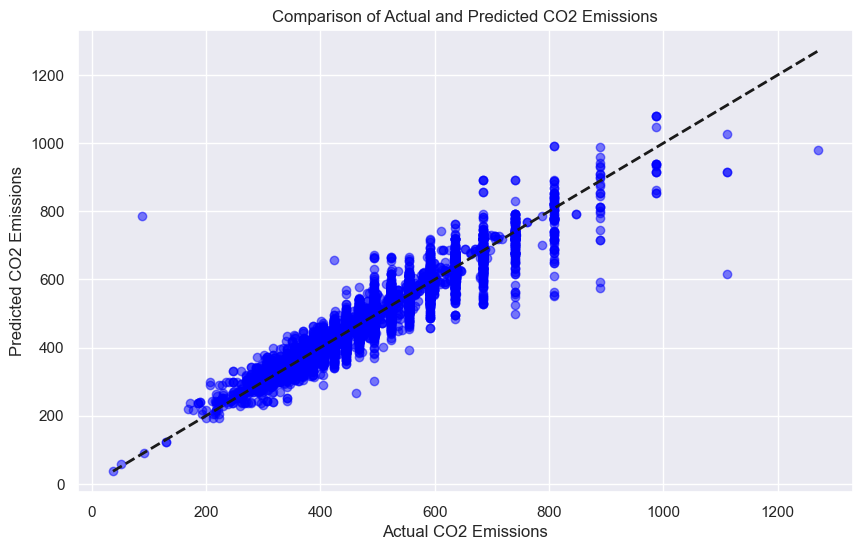

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sb

# Load data
data = pd.read_csv('cleanedco2data.csv')

# One-hot encode categorical variables
categorical_vars = ['turbocharger', 'fuel_type', 'class', 'transmission', 'drive', 'engine_cylinders']
data = pd.get_dummies(data, columns=categorical_vars)

# Define features and target
X = data.drop('tailpipe_co2_in_grams_mile_ft1', axis=1)
y = data['tailpipe_co2_in_grams_mile_ft1']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model with Input layer
model = models.Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with reduced verbosity
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred = model.predict(X_test_scaled).flatten()

# Final visualization: Actual vs. Predicted CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line representing perfect predictions
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Comparison of Actual and Predicted CO2 Emissions')
plt.show()


### Neural network - The provided scatter plot illustrates the predictive performance of a machine learning model on CO2 emissions. Points closely clustered around the diagonal line indicate accurate predictions for lower emission values. However, the dispersion of points away from the line at higher emission values suggests reduced predictive accuracy in this range. The concentration of data near the lower end of the axis implies a skewed dataset with fewer high-emission examples, potentially contributing to the decreased model performance for higher emissions.

# Overall Conclusion and future implications:

## We repeated running the model multiple times and we consitently got these results:
## Class is the most significant predictor variable based oN GBM and SVM . Vans have the most CO2 emisison. Hence , governments can impose a restriction on the numberof vans used as means of transport .
## According to our logidtic regression model , transmission is the most significant predictor variable that influences CO2 emissions. Hence, its also advisable for govenrments tp copnsider this and impose regulations accordingly.


## Governments can impose informed policies tailored to vehicle attributes, curbing emissions effectively.
## Vehicle industries can refine engineering and manufacturing processes, fostering the production of greener vehicles.
## Educating the public on CO2 emissions' significance empowers informed vehicle purchasing decisions.
